# Task 2 - Superstore_USA

#### 1. Load this data in sql and in pandas with a relation in sql 

In [40]:
import pandas as pd

orders = pd.read_excel("Superstore_USA.xlsx", sheet_name='Orders')
orders.head()

Row ID Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
0   18606  Not Specified      0.01        2.88           0.50            2   
1   20847           High      0.01        2.84           0.93            3   
2   23086  Not Specified      0.03        6.68           6.15            3   
3   23087  Not Specified      0.01        5.68           3.60            3   
4   23088  Not Specified      0.00      205.99           2.50            3   

     Customer Name    Ship Mode Customer Segment Product Category  ...  \
0  Janice Fletcher  Regular Air        Corporate  Office Supplies  ...   
1    Bonnie Potter  Express Air        Corporate  Office Supplies  ...   
2    Bonnie Potter  Express Air        Corporate  Office Supplies  ...   
3    Bonnie Potter  Regular Air        Corporate  Office Supplies  ...   
4    Bonnie Potter  Express Air        Corporate       Technology  ...   

    Region State or Province       City  Postal Code Order Date  Ship Date  \
0  Central          Illinois    Addison        60101 2012-05-28 2012-05-30   
1     West        Washington  Anacortes        98221 2010-07-07 2010-07-08   
2     West        Washington  Anacortes        98221 2011-07-27 2011-07-28   
3     West        Washington  Anacortes        98221 2011-07-27 2011-07-28   
4     West        Washington  Anacortes        98221 2011-07-27 2011-07-27   

     Profit  Quantity ordered new    Sales Order ID  
0    1.3200                     2     5.90    88525  
1    4.5600                     4    13.01    88522  
2  -47.6400                     7    49.92    88523  
3  -30.5100                     7    41.64    88523  
4  998.2023                     8  1446.67    88523  

[5 rows x 24 columns]

In [41]:
returns = pd.read_excel("Superstore_USA.xlsx", sheet_name='Returns')
returns.head()

Order ID    Status
0        65  Returned
1       612  Returned
2       614  Returned
3       678  Returned
4       710  Returned

In [42]:
users = pd.read_excel("Superstore_USA.xlsx", sheet_name='Users')
users.head()

Region  Manager
0  Central    Chris
1     East     Erin
2    South      Sam
3     West  William

#### 2. while loading this data you dont have to create a table manually you can use any automated approach to create a table and load a data in bulk in table 

- Previously 'Order Date' and 'Ship Date' columns had datatype as datetime64[ns]. Hence, the system could not convert it into Date datatype for SQL while inserting data into the table.
- Then I looked for columns with datatype as datetime64[ns] and applied a function to the dataframe column to convert the required column to a string.

In [1]:
from excel_import import *

host = 'localhost'
db_name = 'Superstore_USA'
user = 'root'
passwd = 'mysql123'

# Enter excel file name with path
excel_file = 'Superstore_USA.xlsx'

#extract sheet names
sheet_names = sheet_name(excel_file)

#creating dataframe for each sheet
df = create_dataframe(excel_file, sheet_names)

#accessing sheets one by one
for s in sheet_names:
    dataframe = df[s]
    
    #converting columns with 'datetime64[ns]' datatype to required format
    datetime64_list = list(dataframe.select_dtypes(['datetime64[ns]']).columns)
    for i in datetime64_list:
        dataframe[i] = dataframe[i].apply(lambda x:x.strftime('%Y-%m-%d'))
            
    #generating table name
    table_name = clean_table_name(s)
    
    #generating column names
    column_name, dataframe.columns = clean_column_name(dataframe)
    
    #inserting data
    insert_into_db(host, db_name, user, passwd, table_name, column_name, file=s,
                  dataframe=dataframe, df_columns=dataframe.columns)

** opened database successfully **
** orders created successfully **
** opened database successfully **
** returns created successfully **
** opened database successfully **
** users created successfully **


to define relation between tables

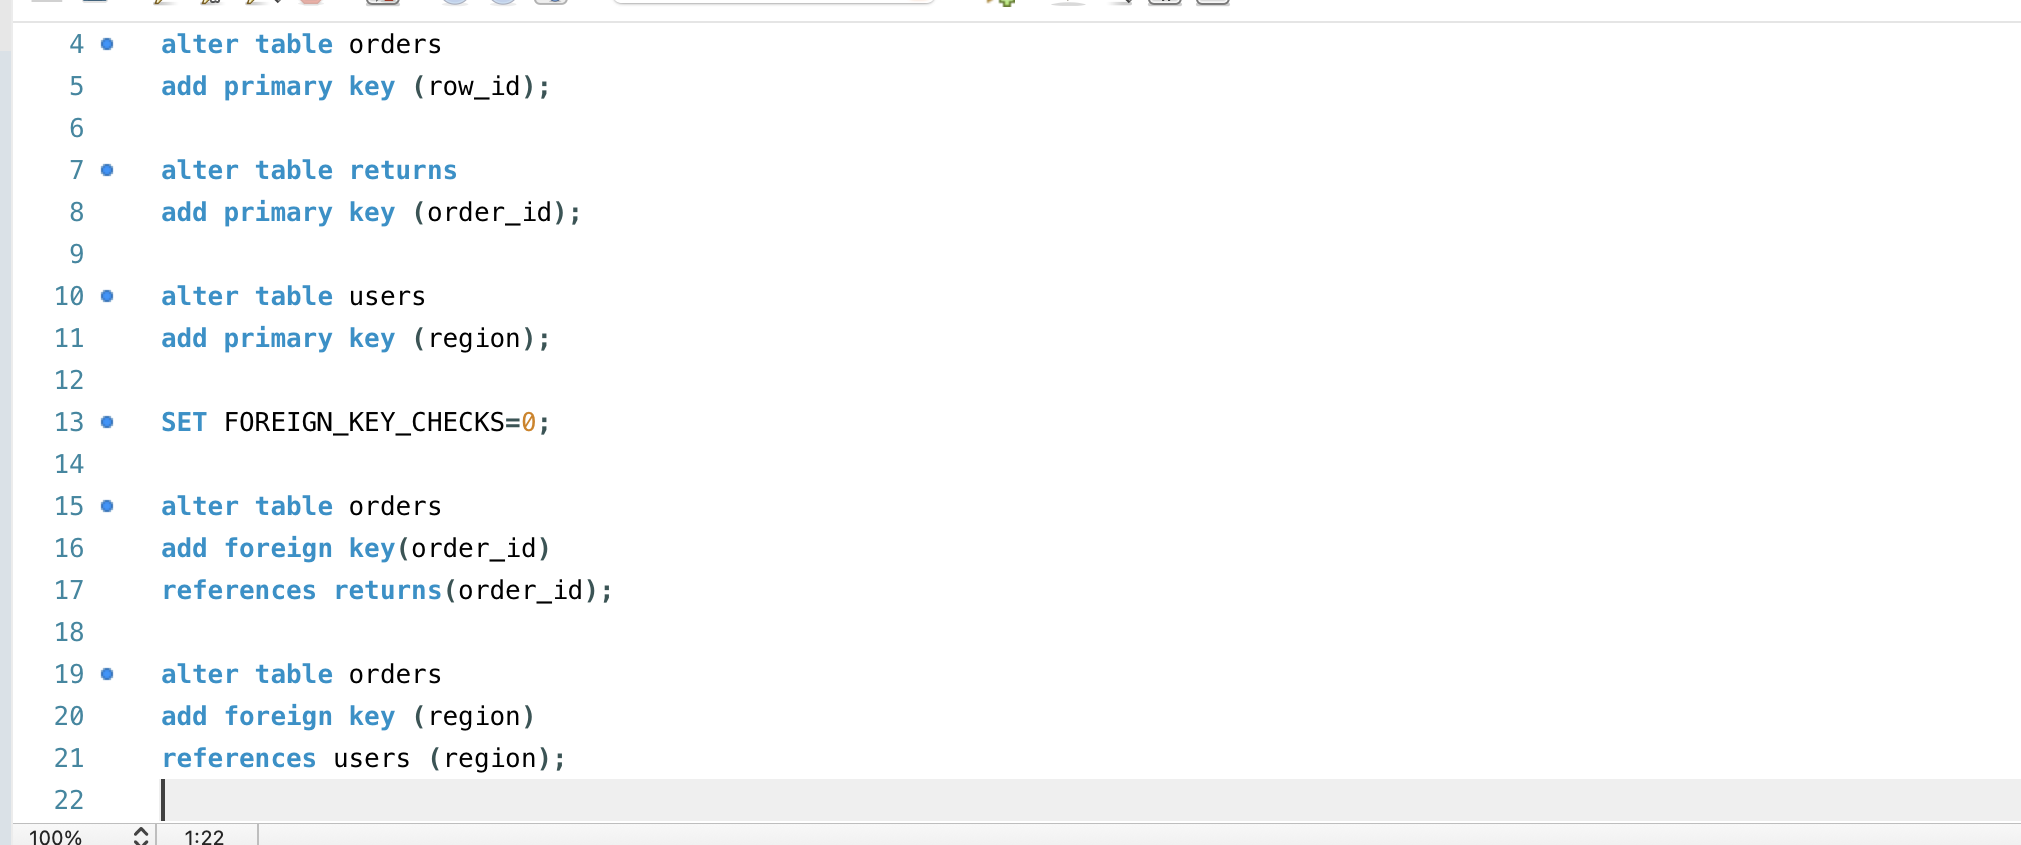

#### 3. Find out how much return that we have received and with a product id 

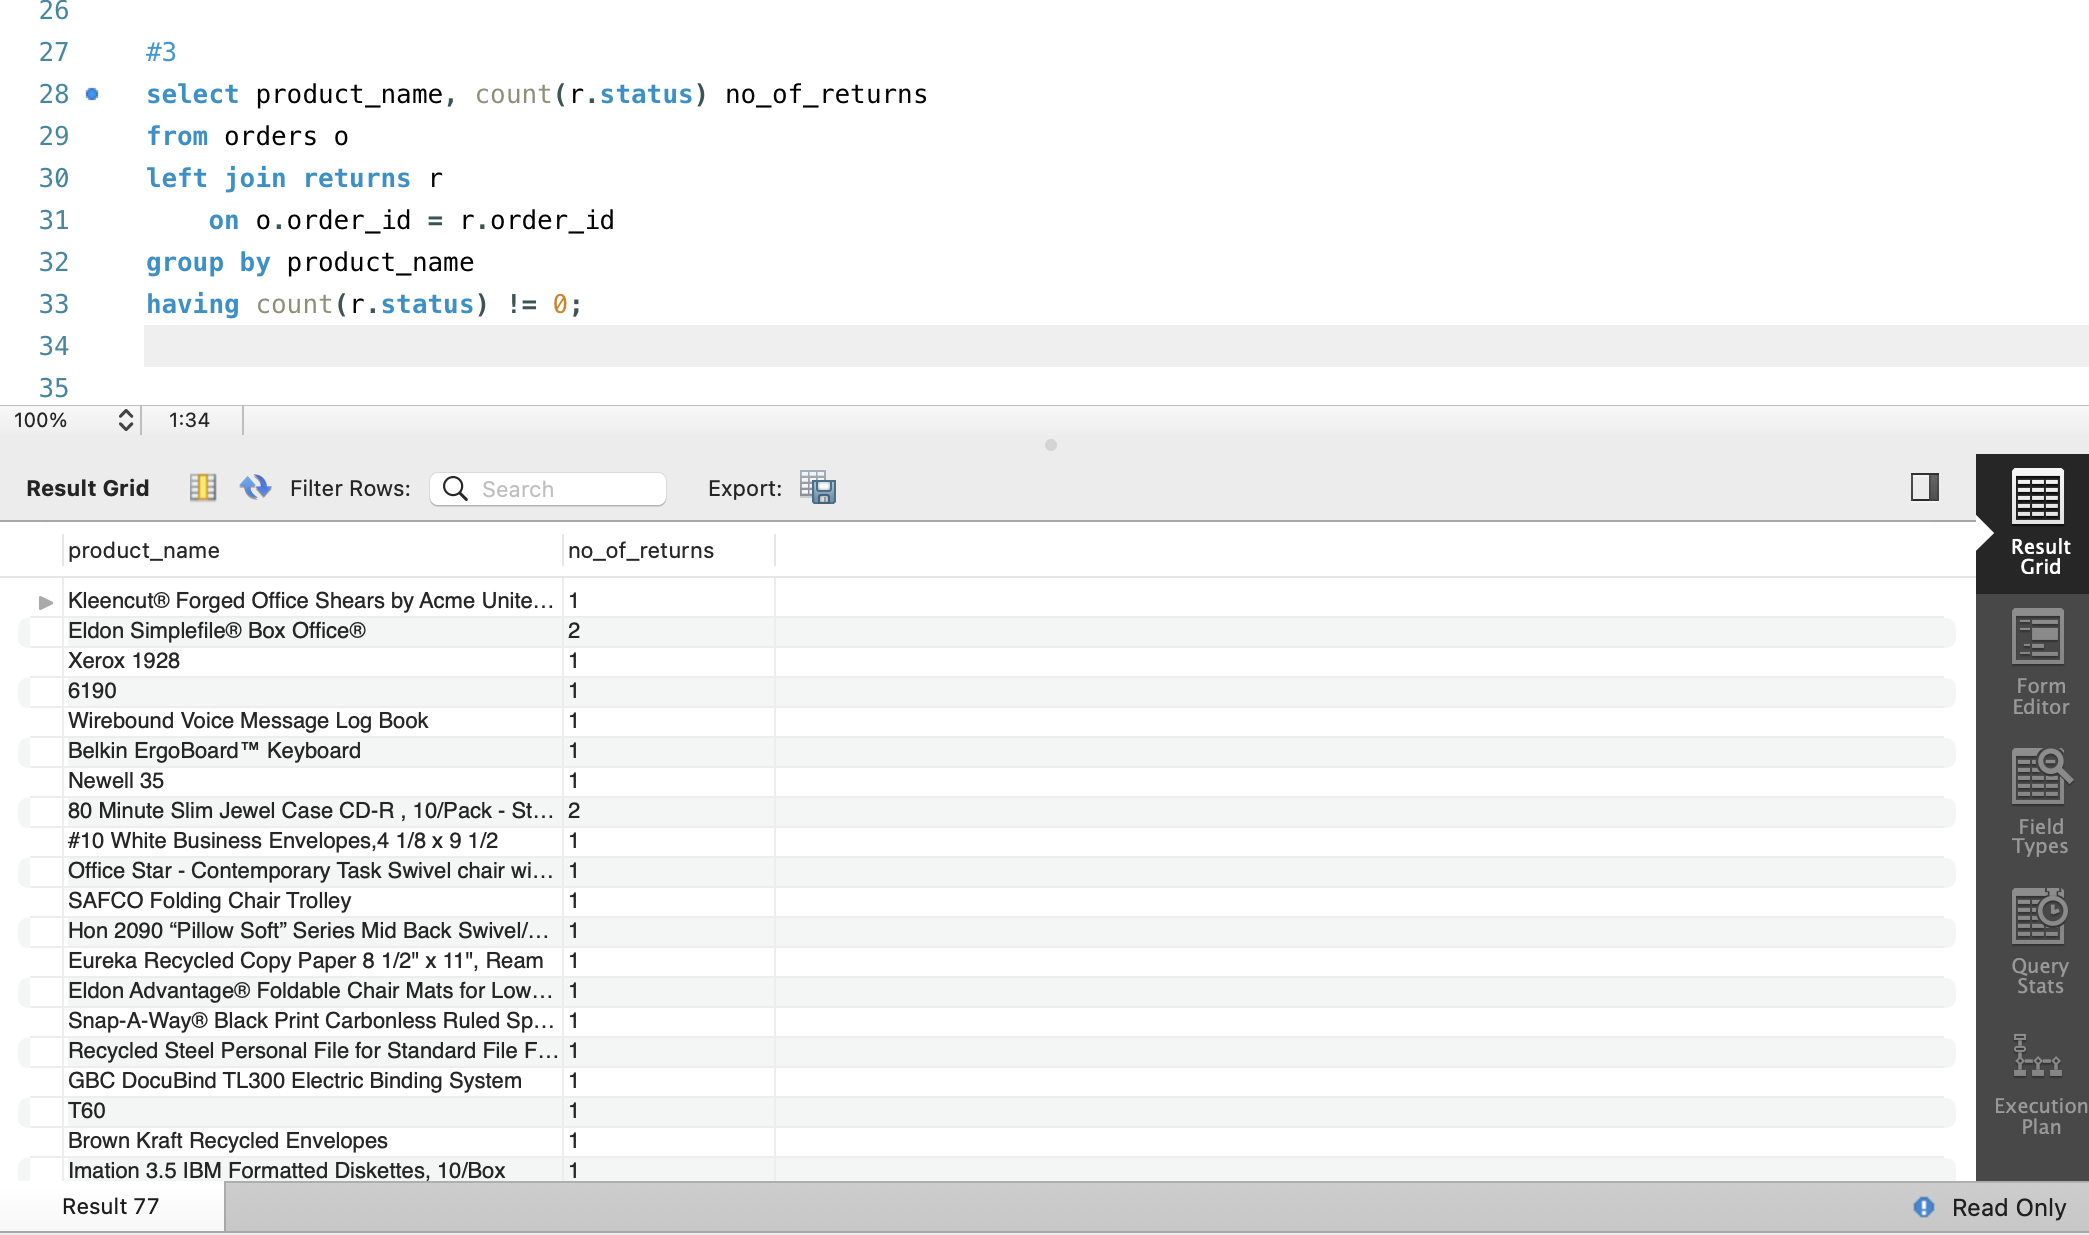

#### 4. try  to join order and return data both in sql and pandas 

In [46]:
pd.merge(orders, returns, how='inner', on='Order ID')

Row ID Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
0     1359            Low      0.05        5.85           2.27           21   
1     1950         Medium      0.01        4.91           0.50          117   
2     1951         Medium      0.09        4.00           1.30          117   
3     5055           High      0.02        3.28           5.00          117   
4     5573            Low      0.02       11.97           5.81          272   
..     ...            ...       ...         ...            ...          ...   
93     986  Not Specified      0.06       37.94           5.08         3075   
94     987  Not Specified      0.10       55.29           5.08         3075   
95    6041         Medium      0.05        4.28           6.18         3075   
96    1910           High      0.05       14.48           1.99         3079   
97    6625           High      0.06      128.24          12.65         3251   

           Customer Name    Ship Mode Customer Segment Product Category  ...  \
0   Tony Wilkins Winters  Regular Air   Small Business  Office Supplies  ...   
1            Linda Weiss  Regular Air      Home Office  Office Supplies  ...   
2            Linda Weiss  Express Air      Home Office  Office Supplies  ...   
3            Linda Weiss  Regular Air      Home Office  Office Supplies  ...   
4          Eleanor Swain  Regular Air   Small Business  Office Supplies  ...   
..                   ...          ...              ...              ...  ...   
93         Gordon Brandt  Regular Air        Corporate  Office Supplies  ...   
94         Gordon Brandt  Regular Air        Corporate  Office Supplies  ...   
95         Gordon Brandt  Express Air        Corporate  Office Supplies  ...   
96         Andrew Levine  Regular Air         Consumer       Technology  ...   
97          Peter Brooks  Regular Air   Small Business        Furniture  ...   

             City Postal Code Order Date  Ship Date     Profit  \
0   New York City       10012 2011-04-20 2011-04-24    -6.8200   
1         Seattle       98103 2010-04-04 2010-04-06   112.0600   
2         Seattle       98103 2010-04-04 2010-04-06    16.7900   
3         Seattle       98103 2013-08-16 2013-08-18   -89.0600   
4       Charlotte       28204 2013-08-12 2013-08-12   -81.9413   
..            ...         ...        ...        ...        ...   
93    Los Angeles       90061 2013-01-04 2013-01-06   -33.9680   
94    Los Angeles       90061 2013-01-04 2013-01-05   163.1200   
95    Los Angeles       90061 2013-06-25 2013-06-27   -22.5600   
96   Philadelphia       19112 2012-09-30 2012-10-02   165.2000   
97  New York City       10112 2012-09-11 2012-09-13  1844.9600   

   Quantity ordered new     Sales  Order ID Shipping Days    Status  
0                     9     54.79      9895        4 days  Returned  
1                    47    228.46     13959        2 days  Returned  
2                    19     77.61     13959        2 days  Returned  
3                    52    190.52     36038        2 days  Returned  
4                    76    912.06     39490        0 days  Returned  
..                  ...       ...       ...           ...       ...  
93                    3    113.14      7107        2 days  Returned  
94                   35   1886.52      7107        1 days  Returned  
95                   12     73.71     42823        2 days  Returned  
96                   96   1337.67     13638        2 days  Returned  
97                   92  12002.16     47109        2 days  Returned  

[98 rows x 26 columns]

In sql :

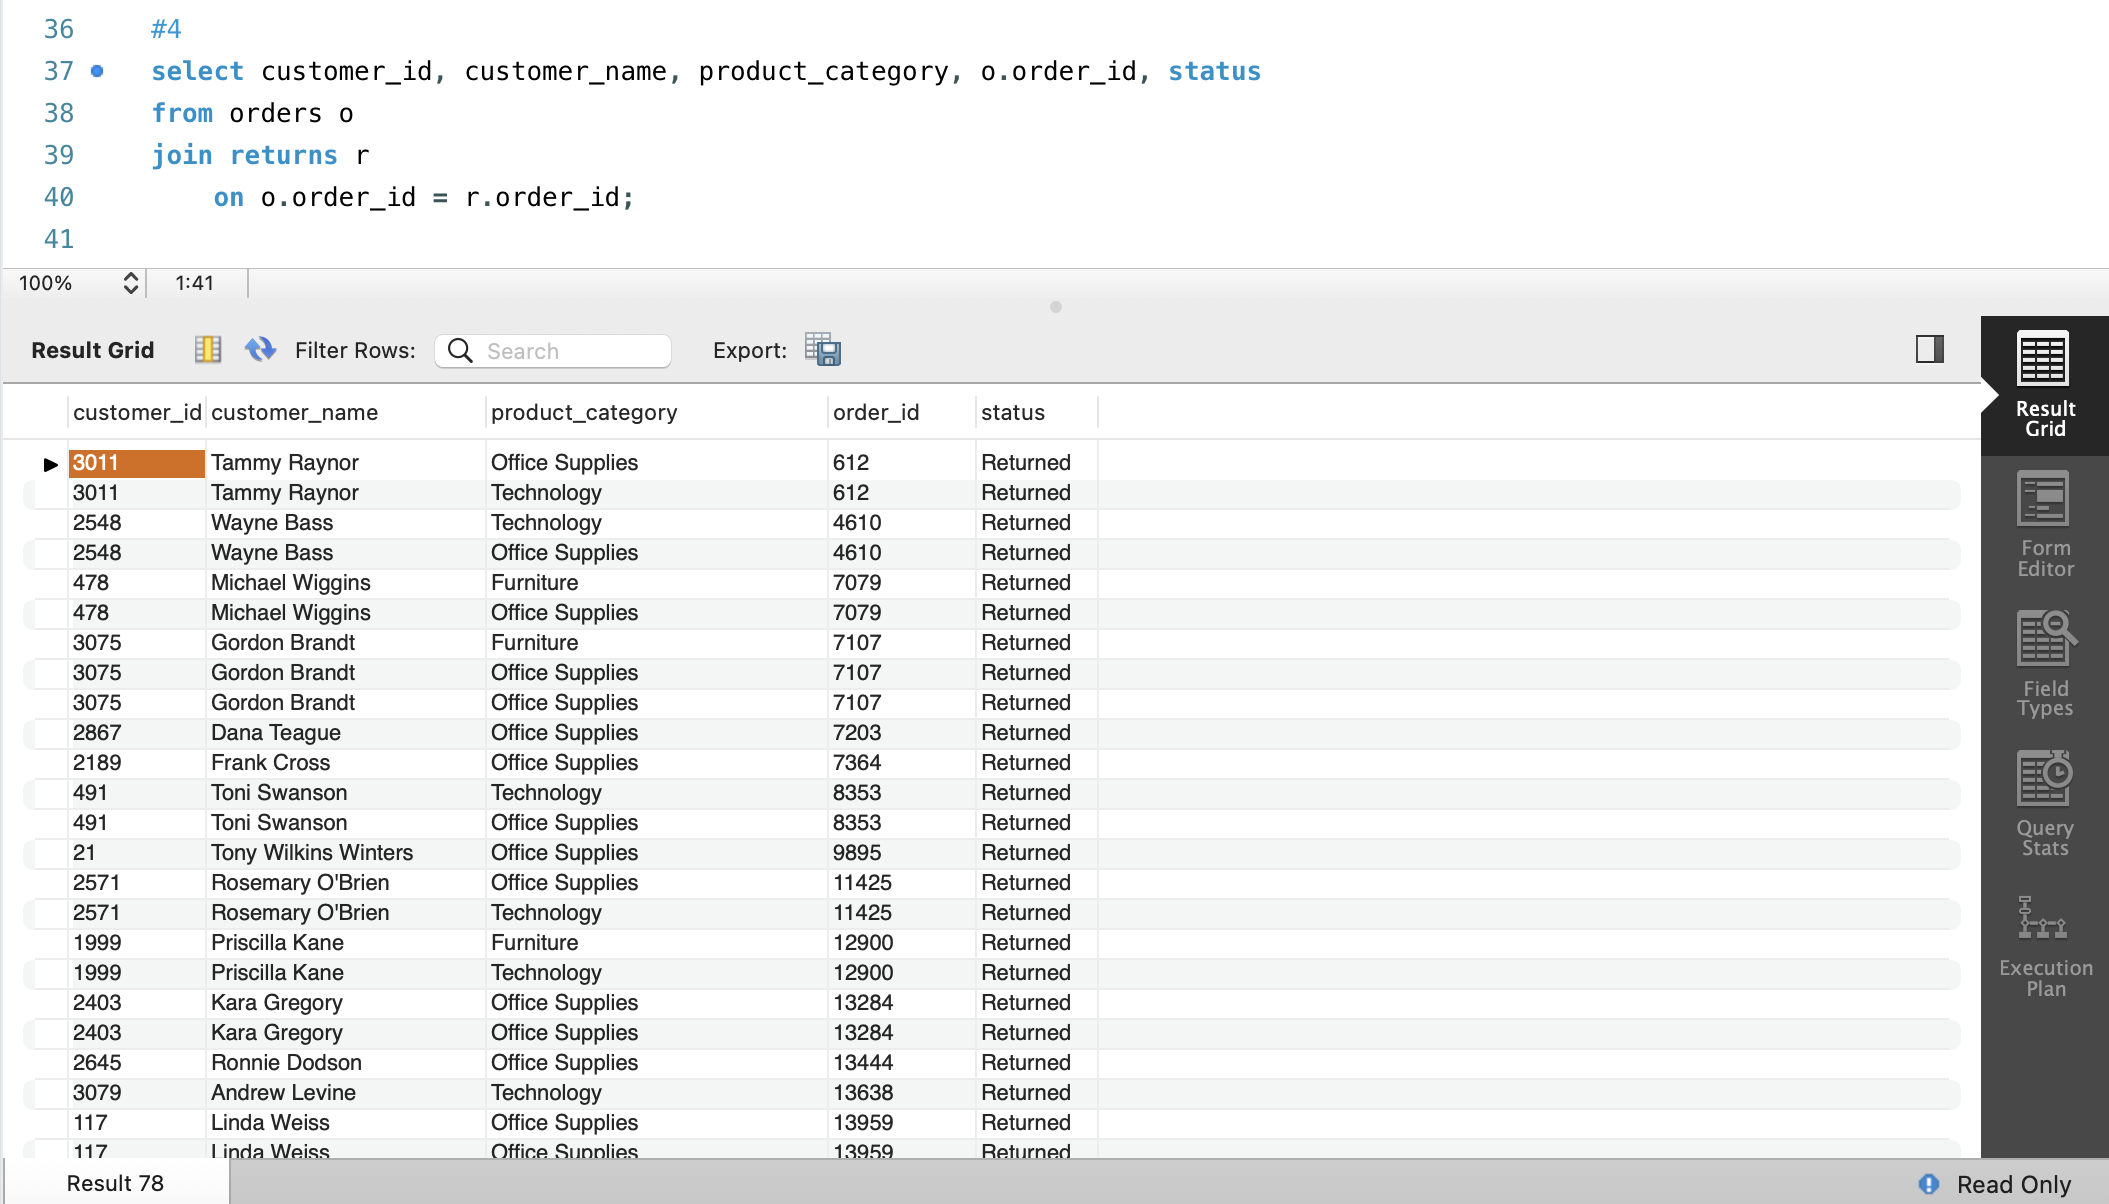

#### 5. Try to find out how many unique customer that we have 

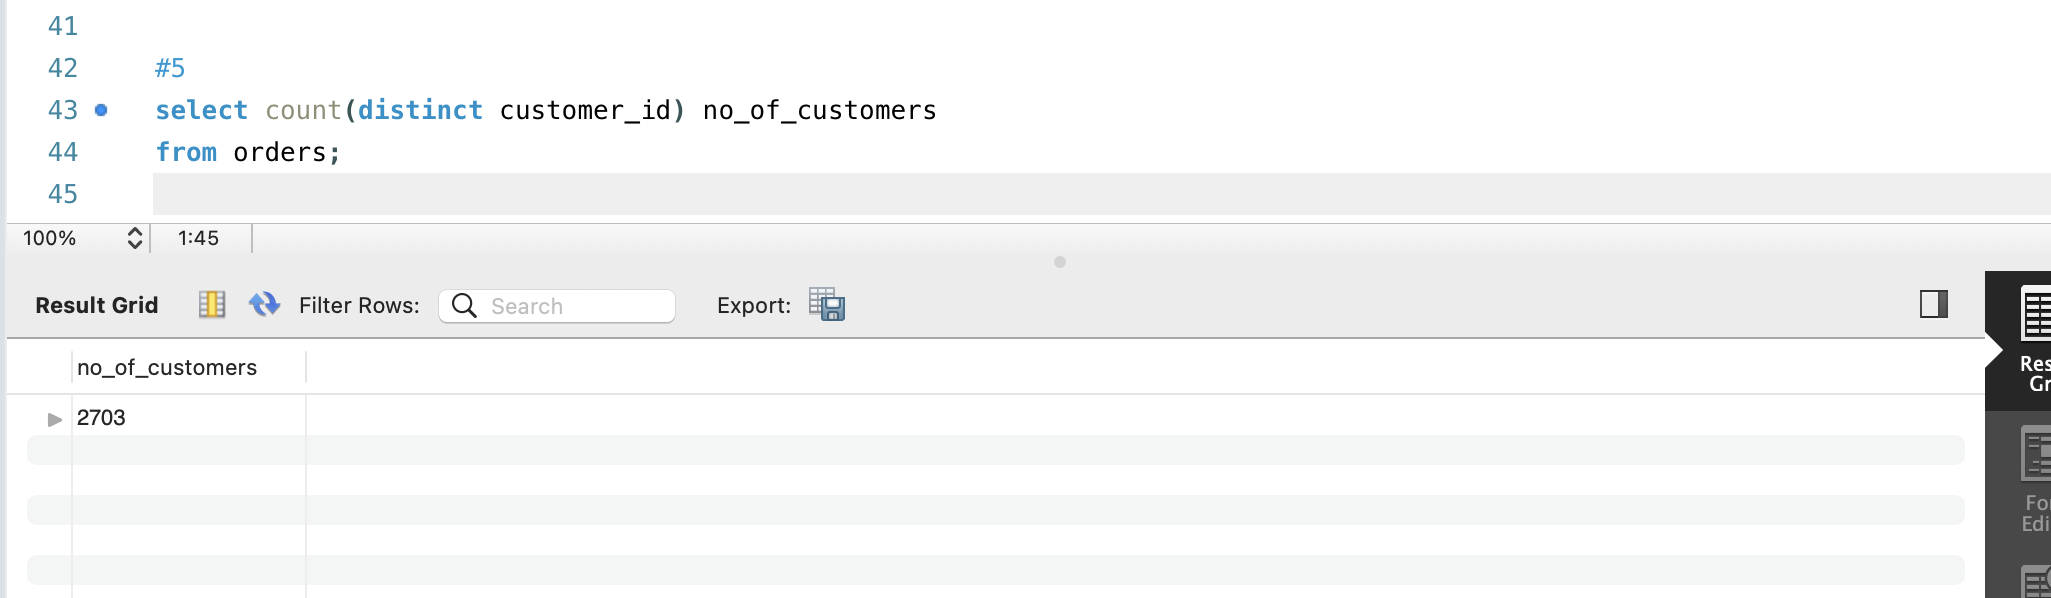

#### 6. try to find out in how many regions we are selling a product and who is a manager for a respective region 

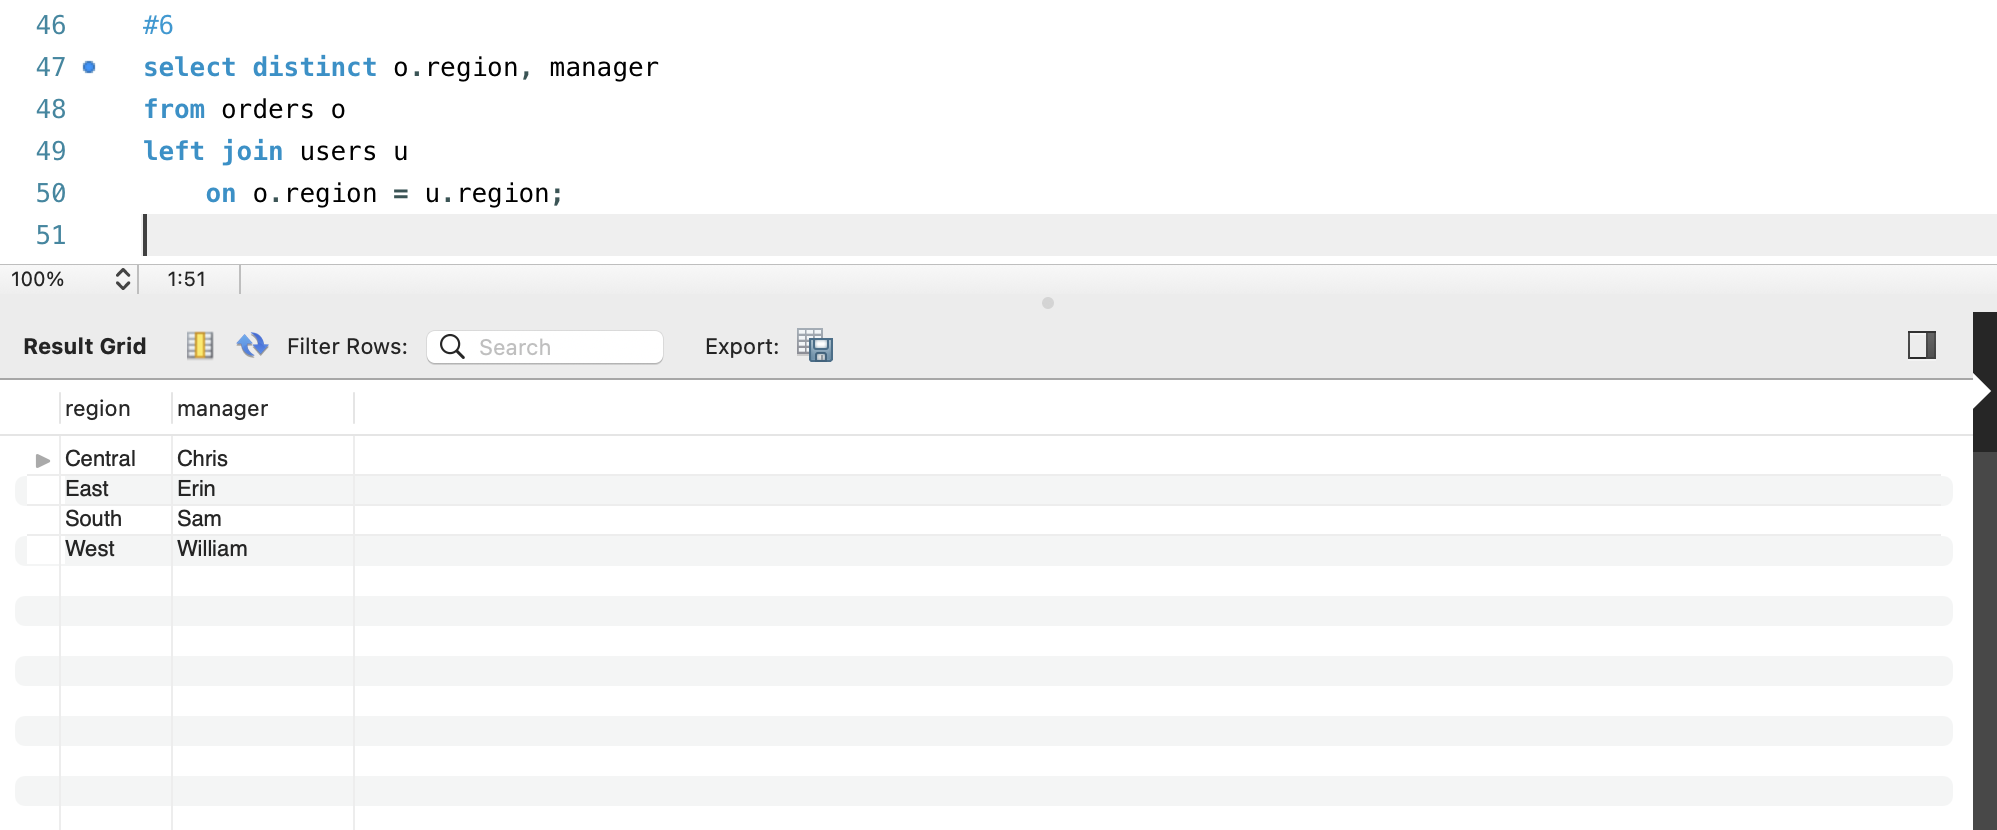

#### 7. find out how many different different shipment mode that we have and what is a percentage usablity of all the shipment mode with respect to dataset 

1. Number of ship modes 

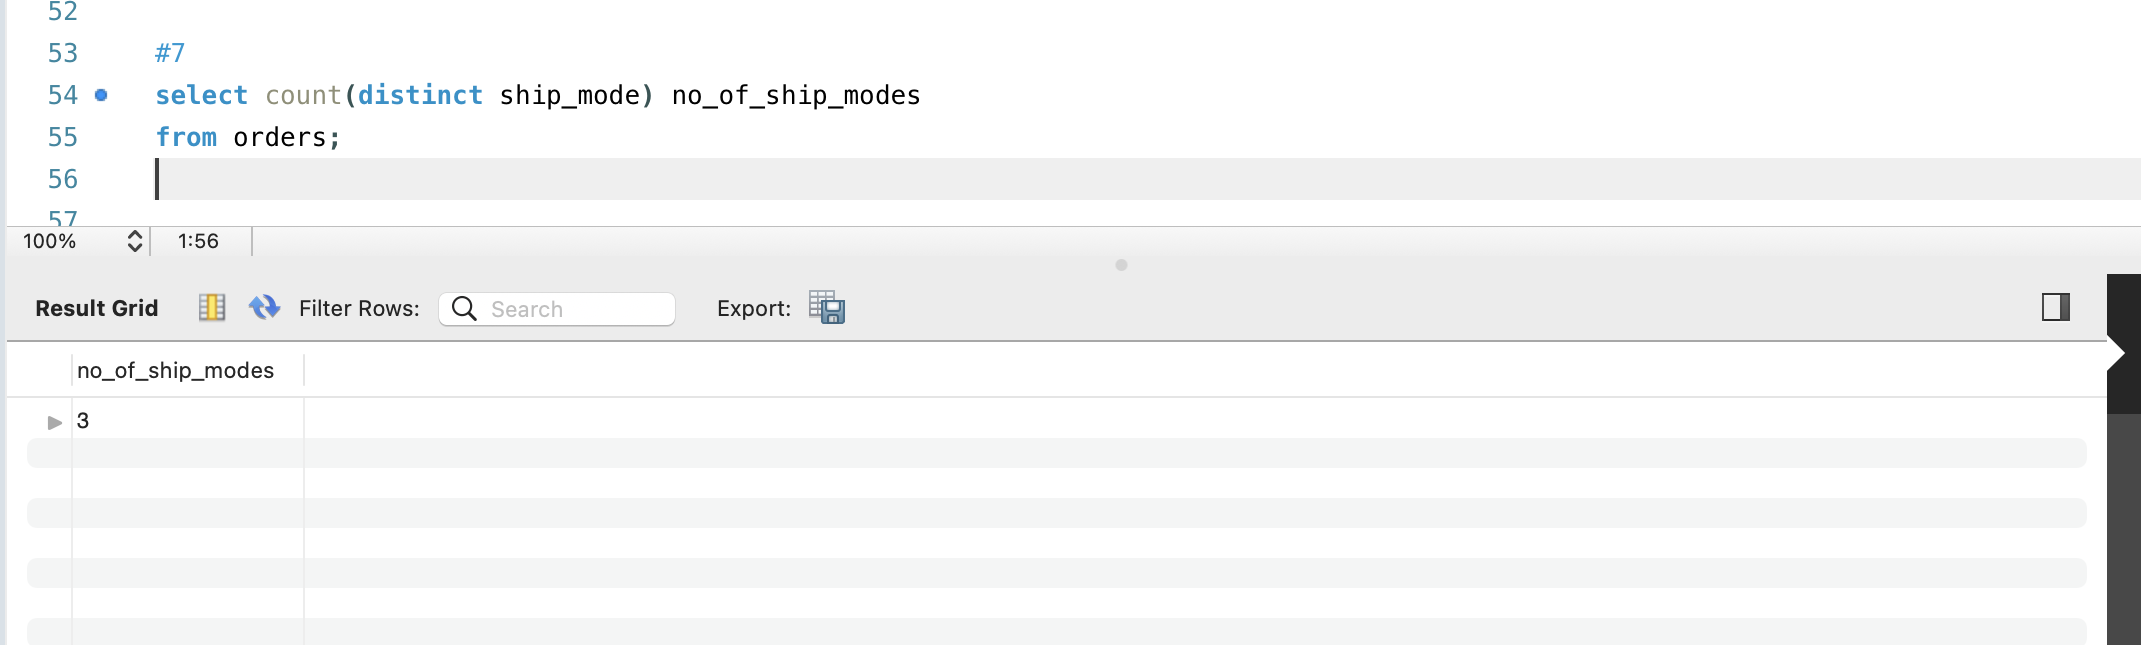

2. Percentage Usability of "Regular Air" shipping mode

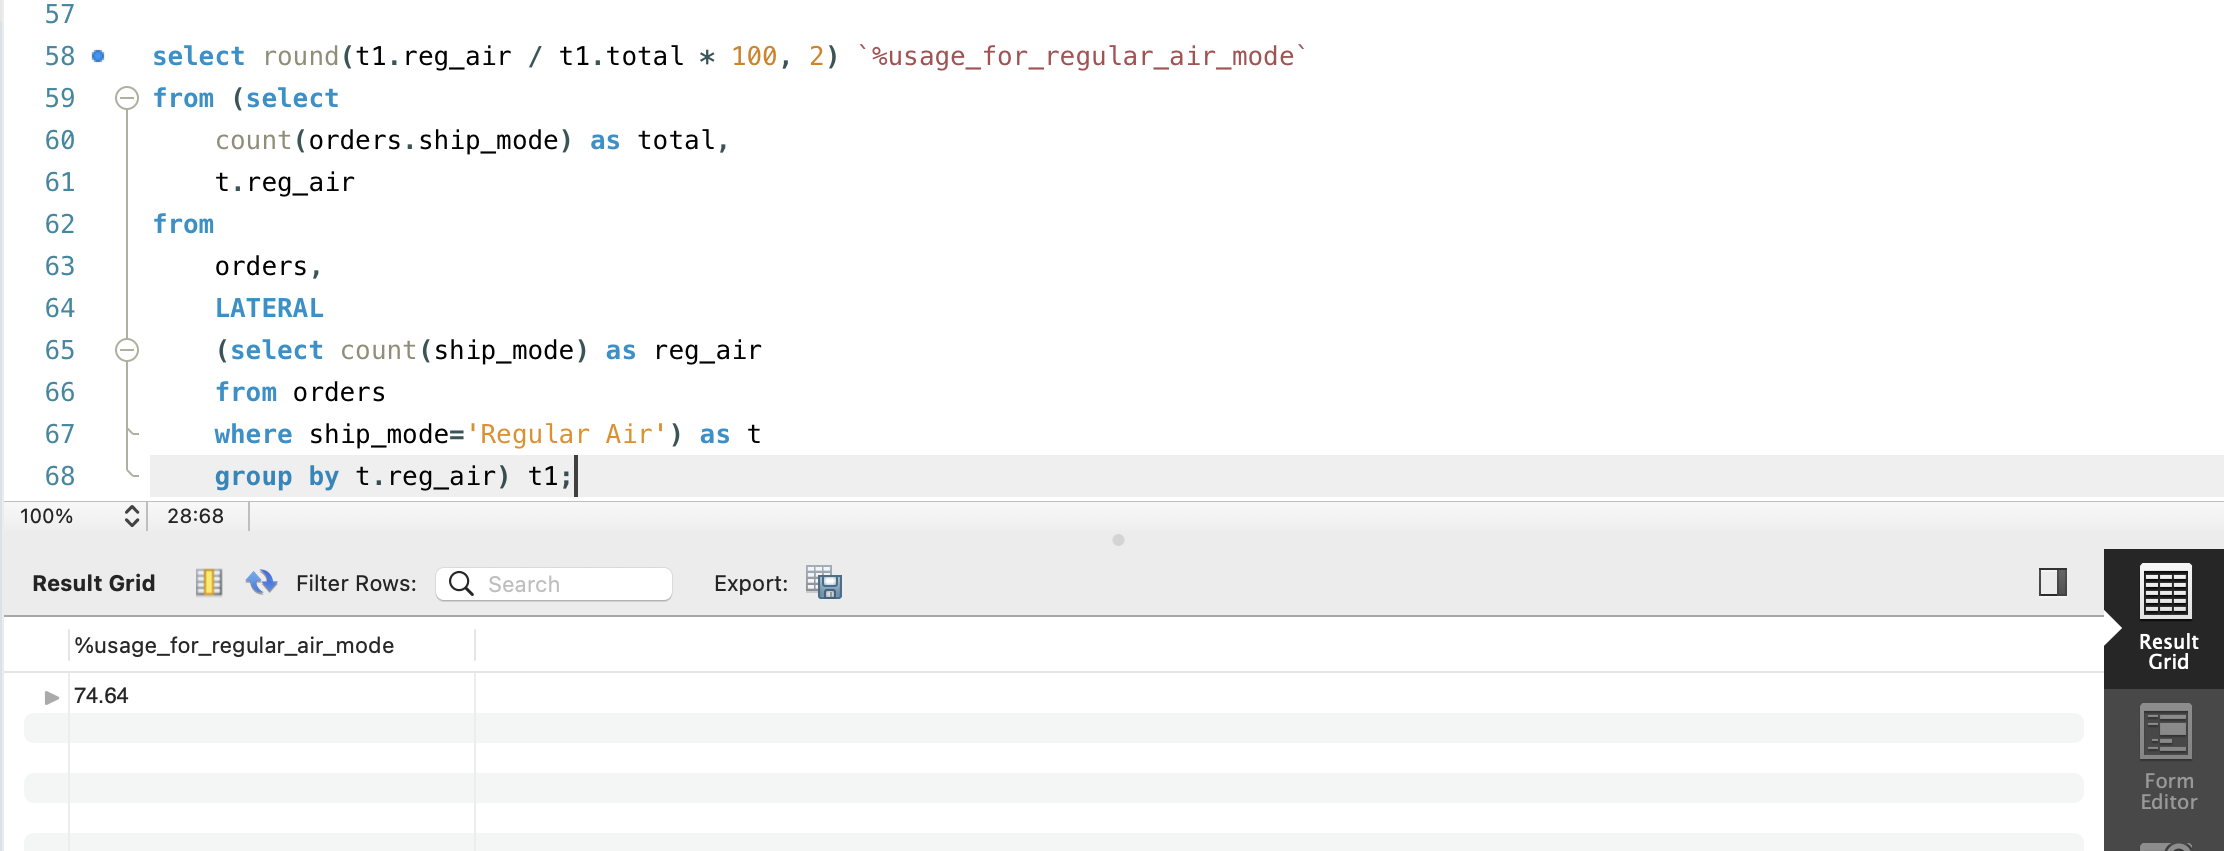

3. Percentage Usability of "Express Air" shipping mode

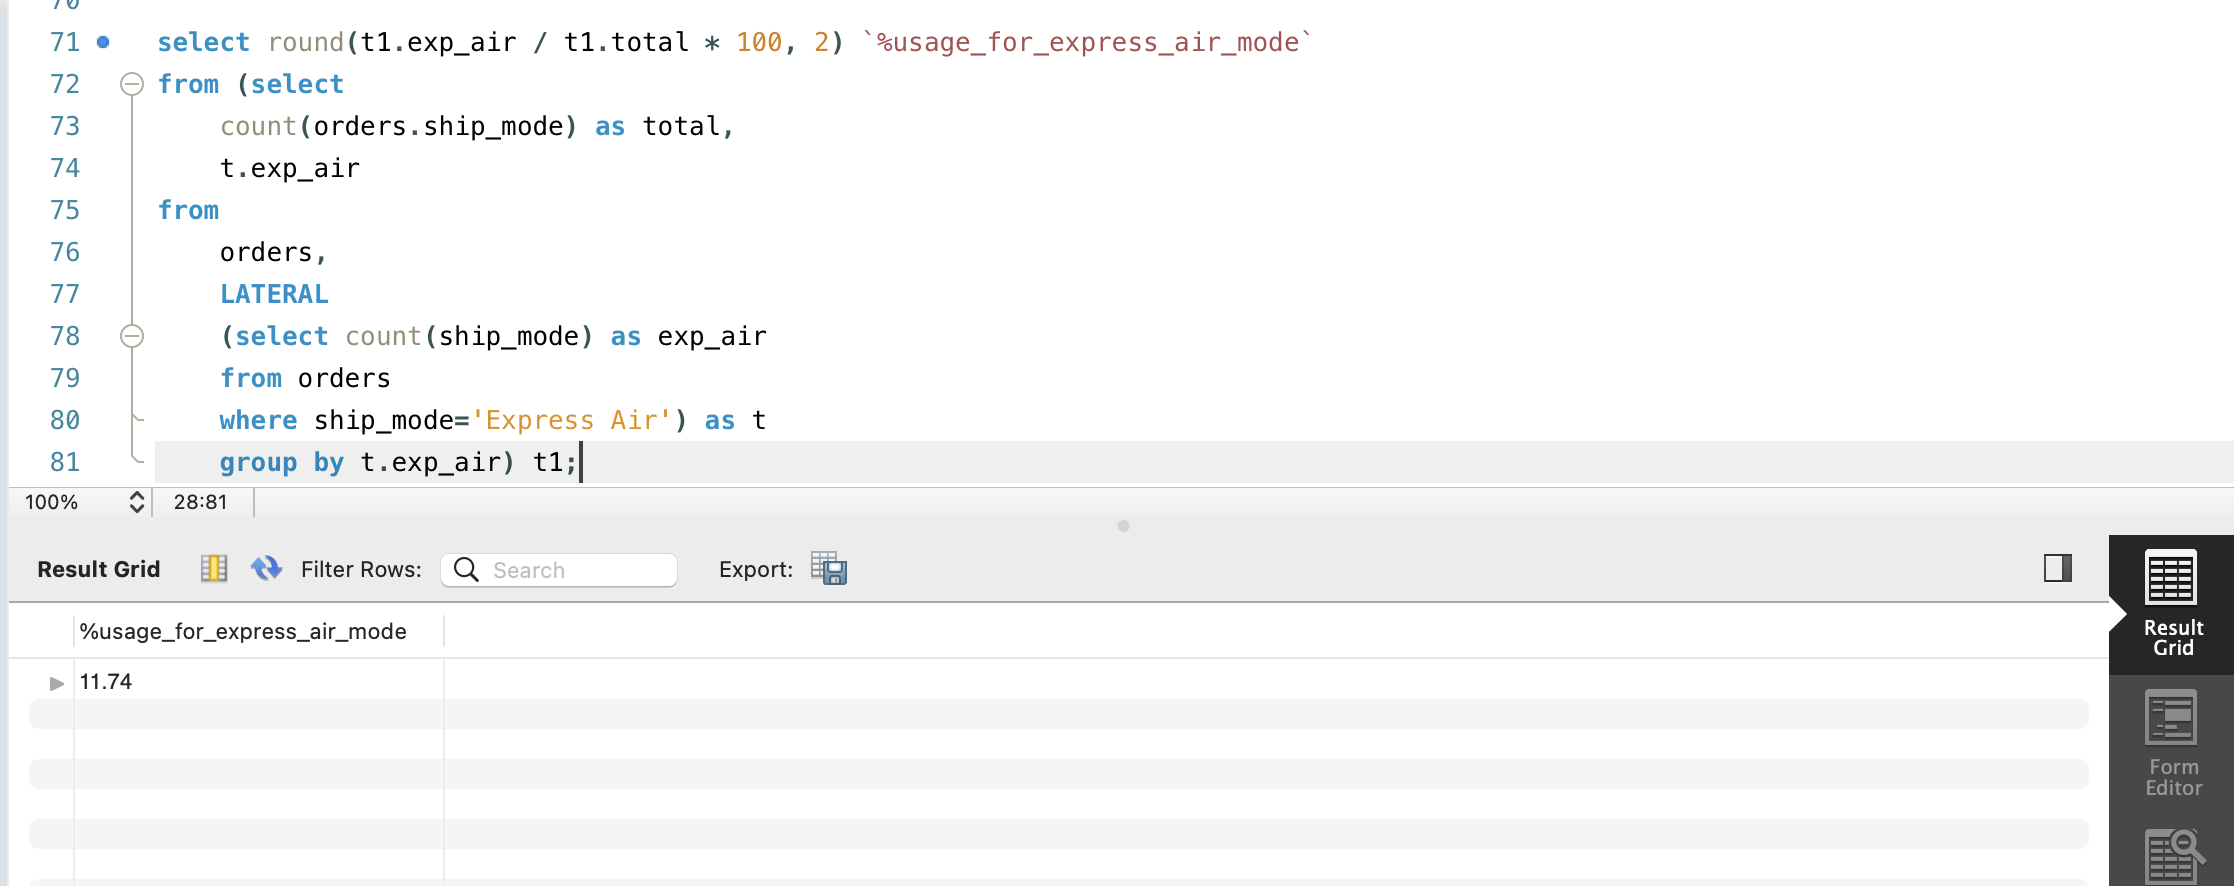

4. Percentage Usability of "Delivery Truck" shipping mode

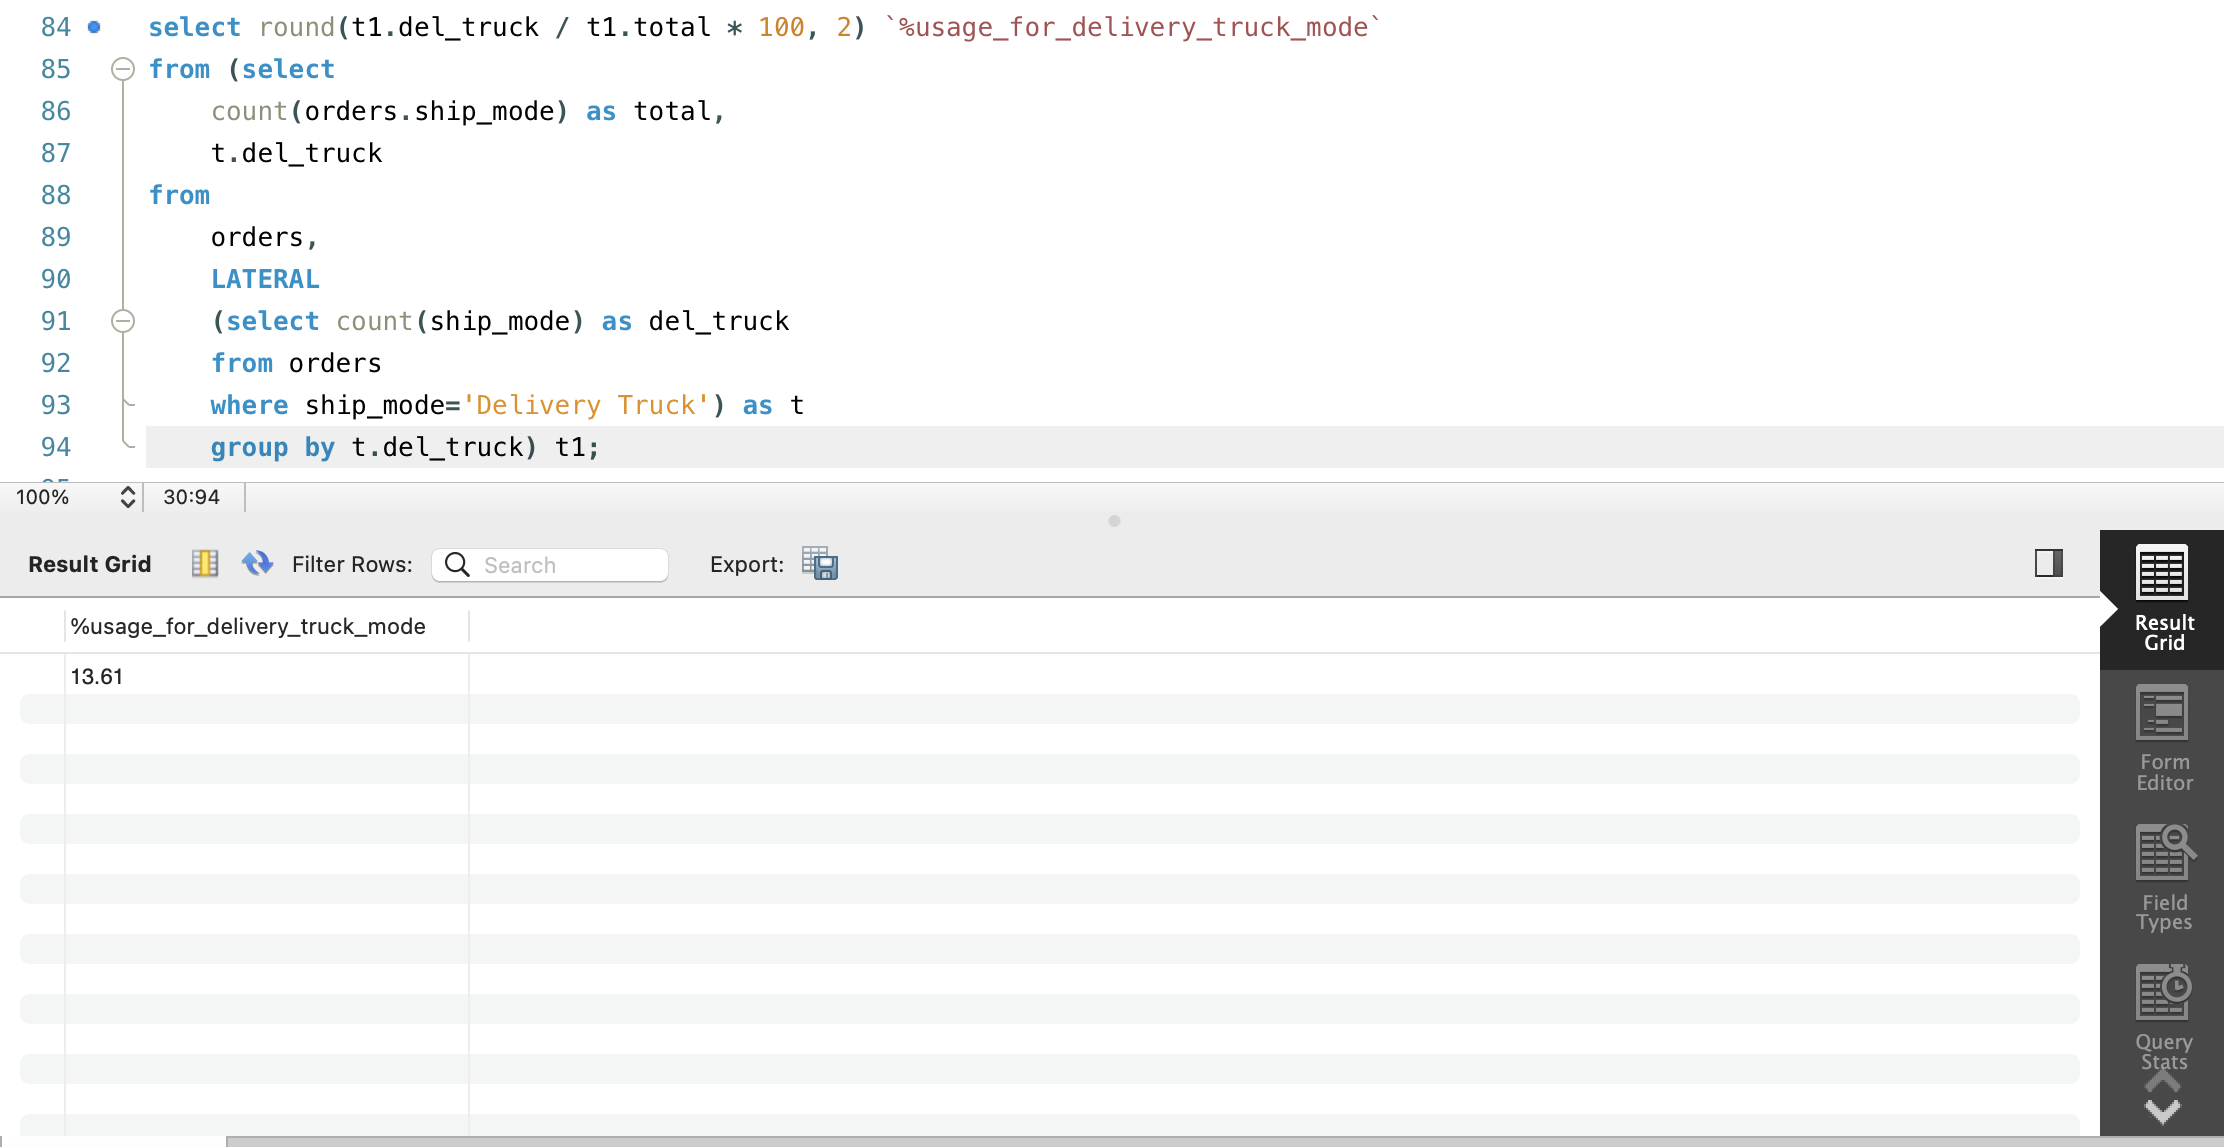

#### 8. Create a new coulmn and try to find out a diffrence between order date and shipment date

In [43]:
orders['Shipping Days'] = orders['Ship Date'] - orders['Order Date']

In [44]:
orders.head()

Row ID Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
0   18606  Not Specified      0.01        2.88           0.50            2   
1   20847           High      0.01        2.84           0.93            3   
2   23086  Not Specified      0.03        6.68           6.15            3   
3   23087  Not Specified      0.01        5.68           3.60            3   
4   23088  Not Specified      0.00      205.99           2.50            3   

     Customer Name    Ship Mode Customer Segment Product Category  ...  \
0  Janice Fletcher  Regular Air        Corporate  Office Supplies  ...   
1    Bonnie Potter  Express Air        Corporate  Office Supplies  ...   
2    Bonnie Potter  Express Air        Corporate  Office Supplies  ...   
3    Bonnie Potter  Regular Air        Corporate  Office Supplies  ...   
4    Bonnie Potter  Express Air        Corporate       Technology  ...   

  State or Province       City Postal Code  Order Date  Ship Date    Profit  \
0          Illinois    Addison       60101  2012-05-28 2012-05-30    1.3200   
1        Washington  Anacortes       98221  2010-07-07 2010-07-08    4.5600   
2        Washington  Anacortes       98221  2011-07-27 2011-07-28  -47.6400   
3        Washington  Anacortes       98221  2011-07-27 2011-07-28  -30.5100   
4        Washington  Anacortes       98221  2011-07-27 2011-07-27  998.2023   

  Quantity ordered new    Sales Order ID Shipping Days  
0                    2     5.90    88525        2 days  
1                    4    13.01    88522        1 days  
2                    7    49.92    88523        1 days  
3                    7    41.64    88523        1 days  
4                    8  1446.67    88523        0 days  

[5 rows x 25 columns]

In sql:

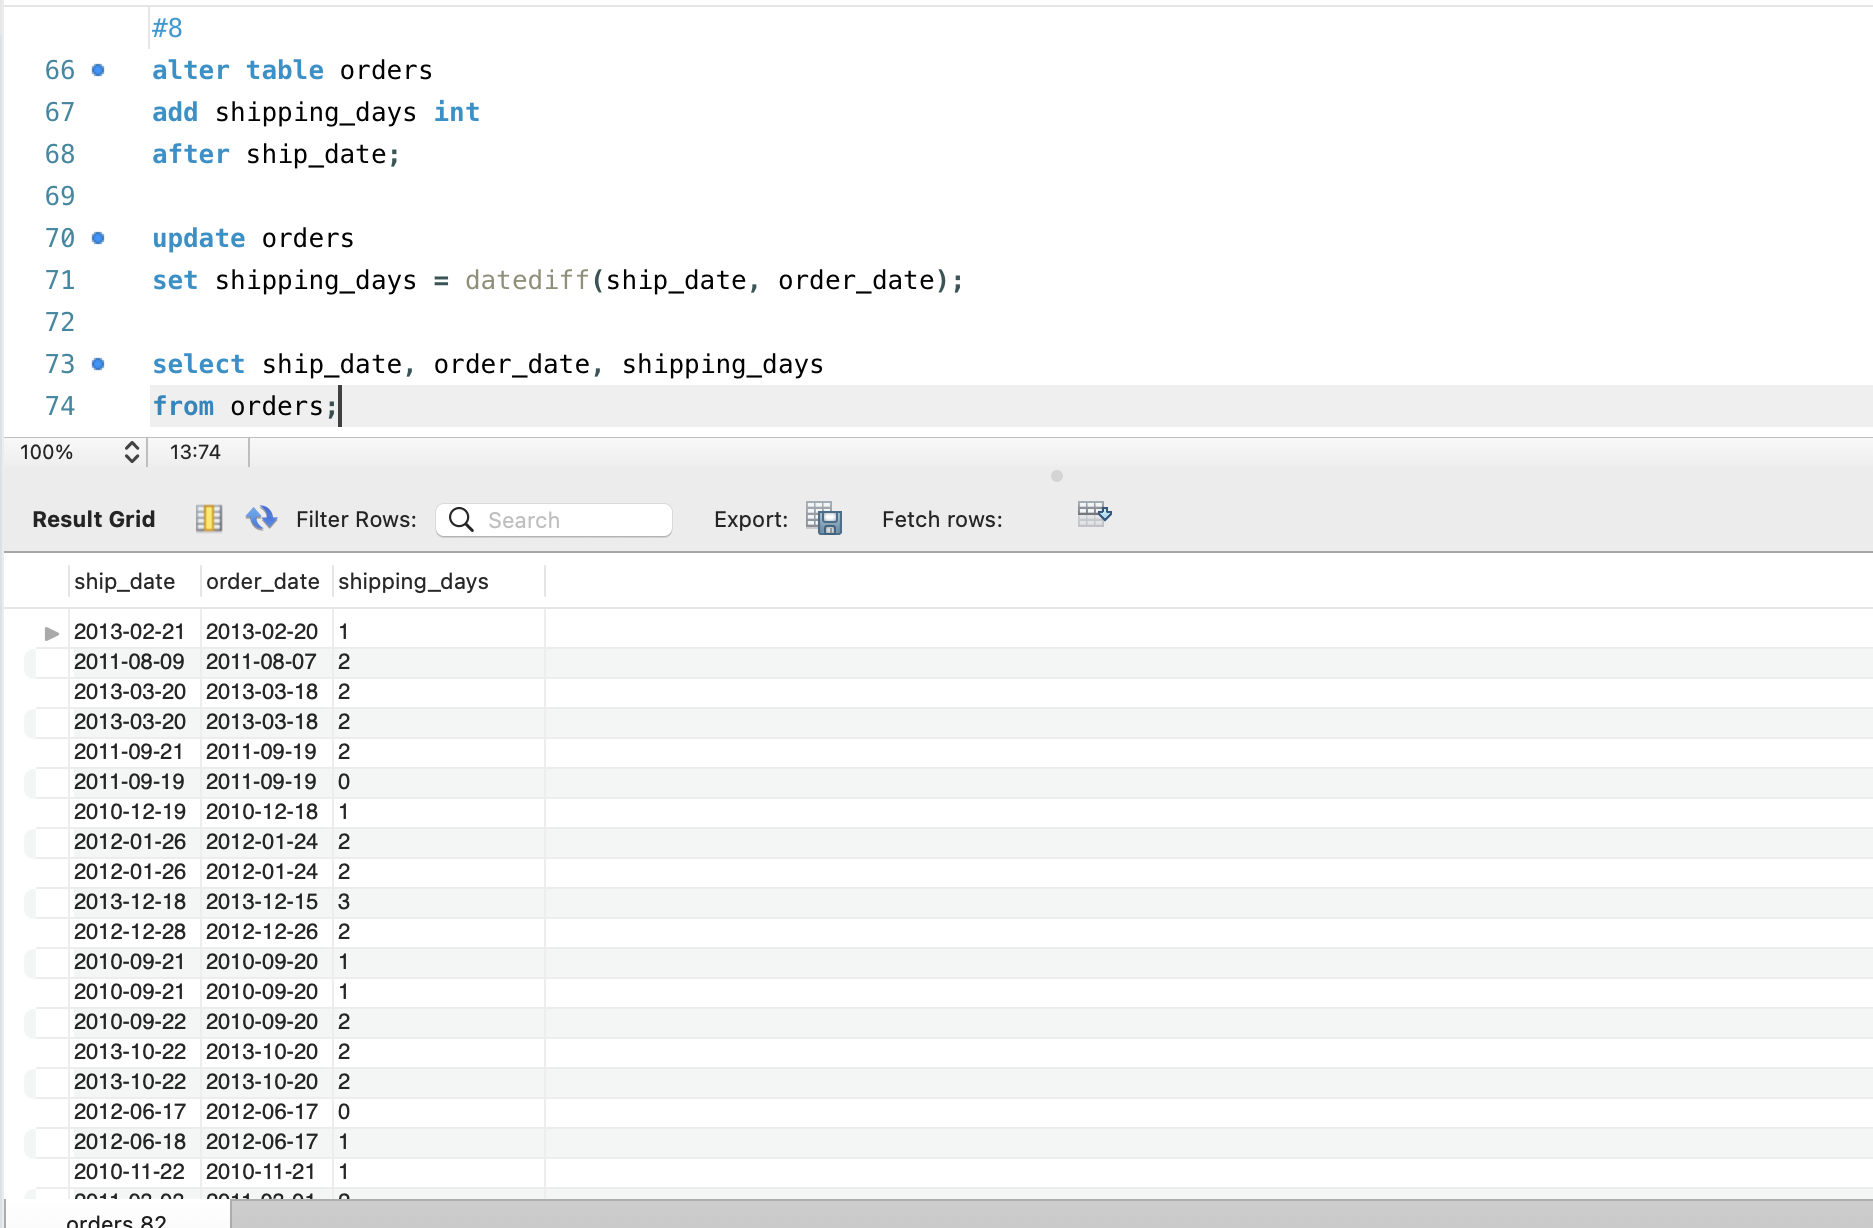

#### 9. Based on question number 8 find out for which order id we have shipment duration more than 10 days

In [45]:
orders[orders['Shipping Days'] > '10 days']

Row ID Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
643    18246       Critical      0.05       11.09           5.25          250   
1548   23091         Medium      0.04      100.98           7.18          595   
1549   23092         Medium      0.09        6.48           7.49          595   
1678   20703  Not Specified      0.07      130.98          30.00          637   
1679   20704  Not Specified      0.09       55.98           4.86          637   
1680   20705  Not Specified      0.08      115.99           4.23          637   
1697    2703  Not Specified      0.07      130.98          30.00          640   
1698    2704  Not Specified      0.09       55.98           4.86          640   
1699    2705  Not Specified      0.08      115.99           4.23          640   
2515   18060            Low      0.02        2.21           1.00          964   
5548   21603  Not Specified      0.02        5.58           1.99         2048   
5673   19005            Low      0.06       65.99           2.50         2088   
5859   24392            Low      0.05       29.89           1.99         2143   
5881   21257            Low      0.05        7.99           5.03         2153   
8607   26351         Medium      0.00        8.32           2.38         3119   
8609   26350         Medium      0.07      180.98          55.24         3119   
8610   26352         Medium      0.06        4.20           2.26         3119   
8973   20750            Low      0.06      125.99           8.08         3248   
8982    2748            Low      0.03       11.97           5.81         3251   
8983    2749            Low      0.08      195.99           4.20         3251   
8993    2750            Low      0.06      125.99           8.08         3251   
8996   20748            Low      0.03       11.97           5.81         3252   
8997   20749            Low      0.08      195.99           4.20         3252   

                Customer Name       Ship Mode Customer Segment  \
643   Brenda Nelson Blanchard     Regular Air        Corporate   
1548               Dana Desai     Regular Air   Small Business   
1549               Dana Desai     Express Air   Small Business   
1678       Christopher Bryant  Delivery Truck         Consumer   
1679       Christopher Bryant     Regular Air         Consumer   
1680       Christopher Bryant     Regular Air         Consumer   
1697               Neal Wolfe  Delivery Truck         Consumer   
1698               Neal Wolfe     Regular Air         Consumer   
1699               Neal Wolfe     Regular Air         Consumer   
2515          Virginia Rivera     Regular Air      Home Office   
5548          Ricky Dougherty     Regular Air         Consumer   
5673             Carrie Boyle     Regular Air        Corporate   
5859            Lester Sawyer     Regular Air      Home Office   
5881               Anna Glenn     Regular Air      Home Office   
8607              Jay Hubbard     Express Air        Corporate   
8609              Jay Hubbard  Delivery Truck        Corporate   
8610              Jay Hubbard     Regular Air        Corporate   
8973            Earl Donnelly     Express Air        Corporate   
8982             Peter Brooks     Regular Air        Corporate   
8983             Peter Brooks     Regular Air        Corporate   
8993             Peter Brooks     Express Air        Corporate   
8996           Milton Harrell     Regular Air        Corporate   
8997           Milton Harrell     Regular Air        Corporate   

     Product Category  ... State or Province           City Postal Code  \
643   Office Supplies  ...         Minnesota      Richfield       55423   
1548       Technology  ...           Indiana    Bloomington       47401   
1549  Office Supplies  ...           Indiana    Bloomington       47401   
1678        Furniture  ...        California    Santa Clara       95051   
1679  Office Supplies  ...        California    Santa Clara       95051   
1680       Technology  ...

In sql:

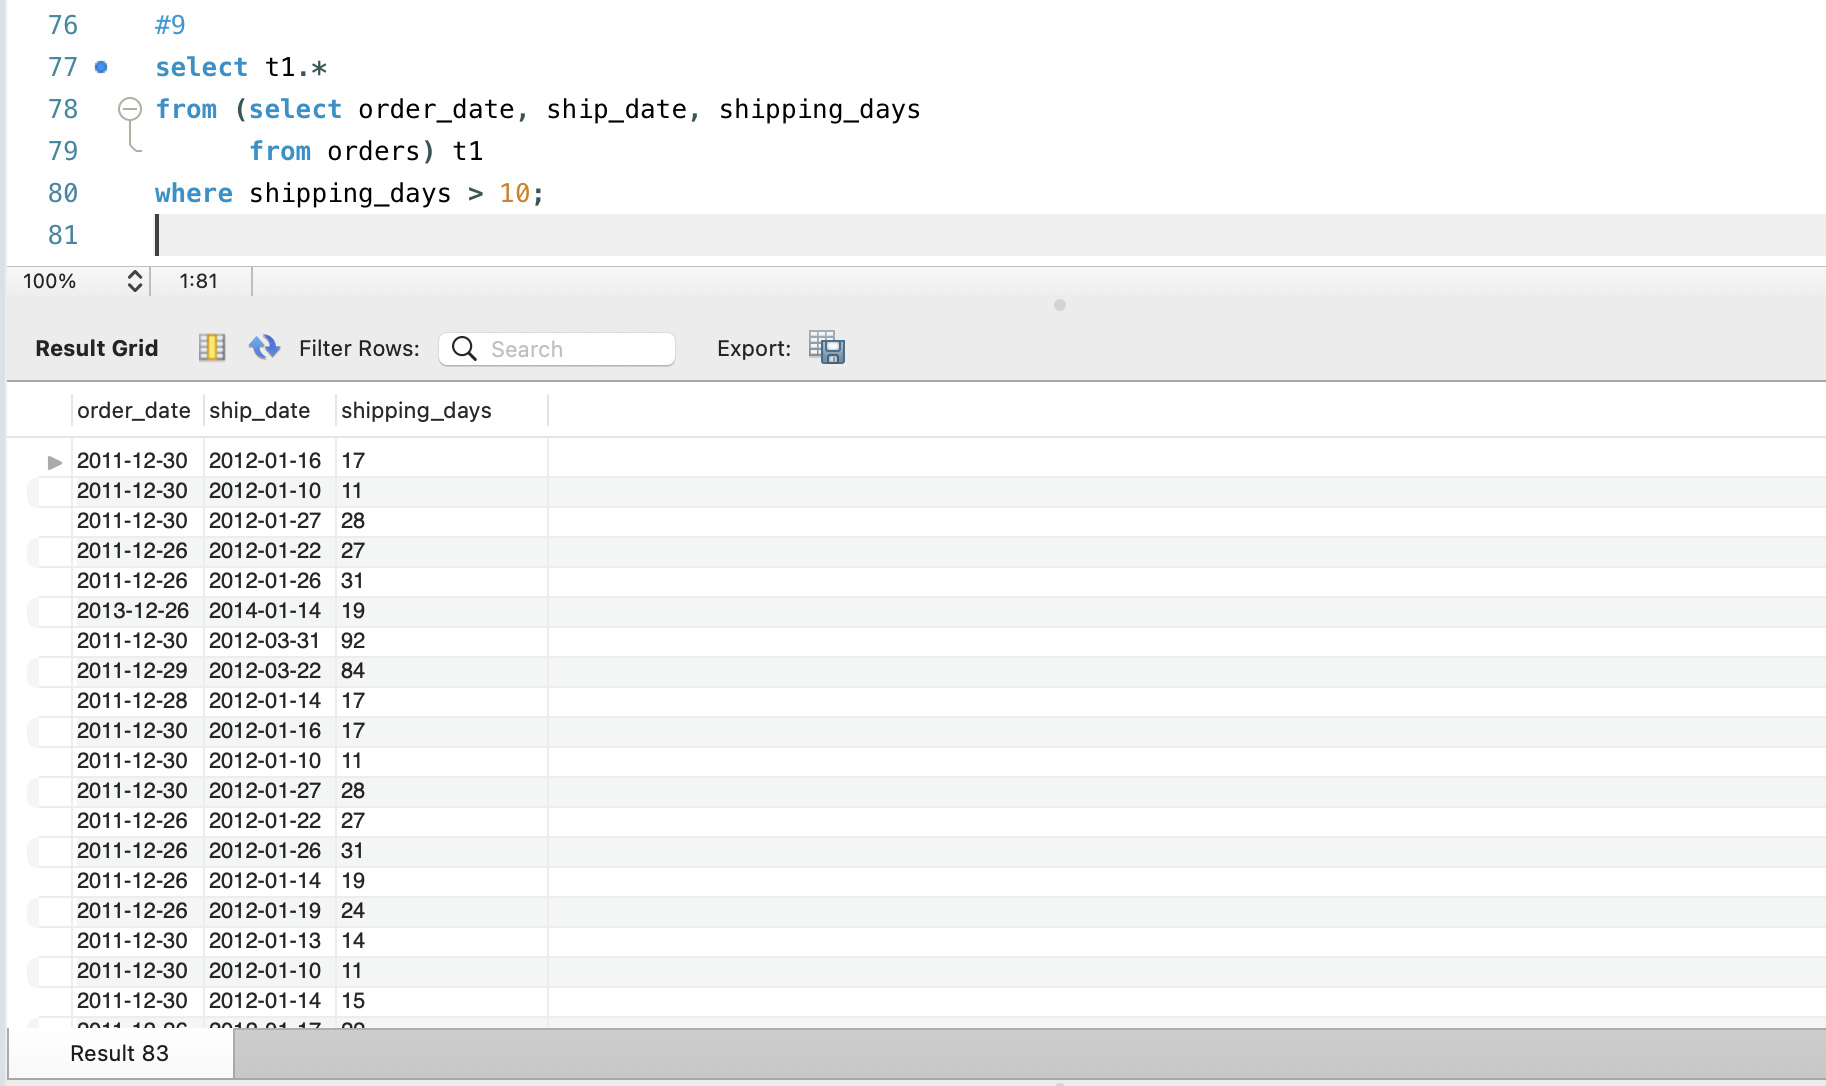

#### 10. Try to find out a list of a returned order for which shipment duration was more then 15 days and find out that region manager as well 

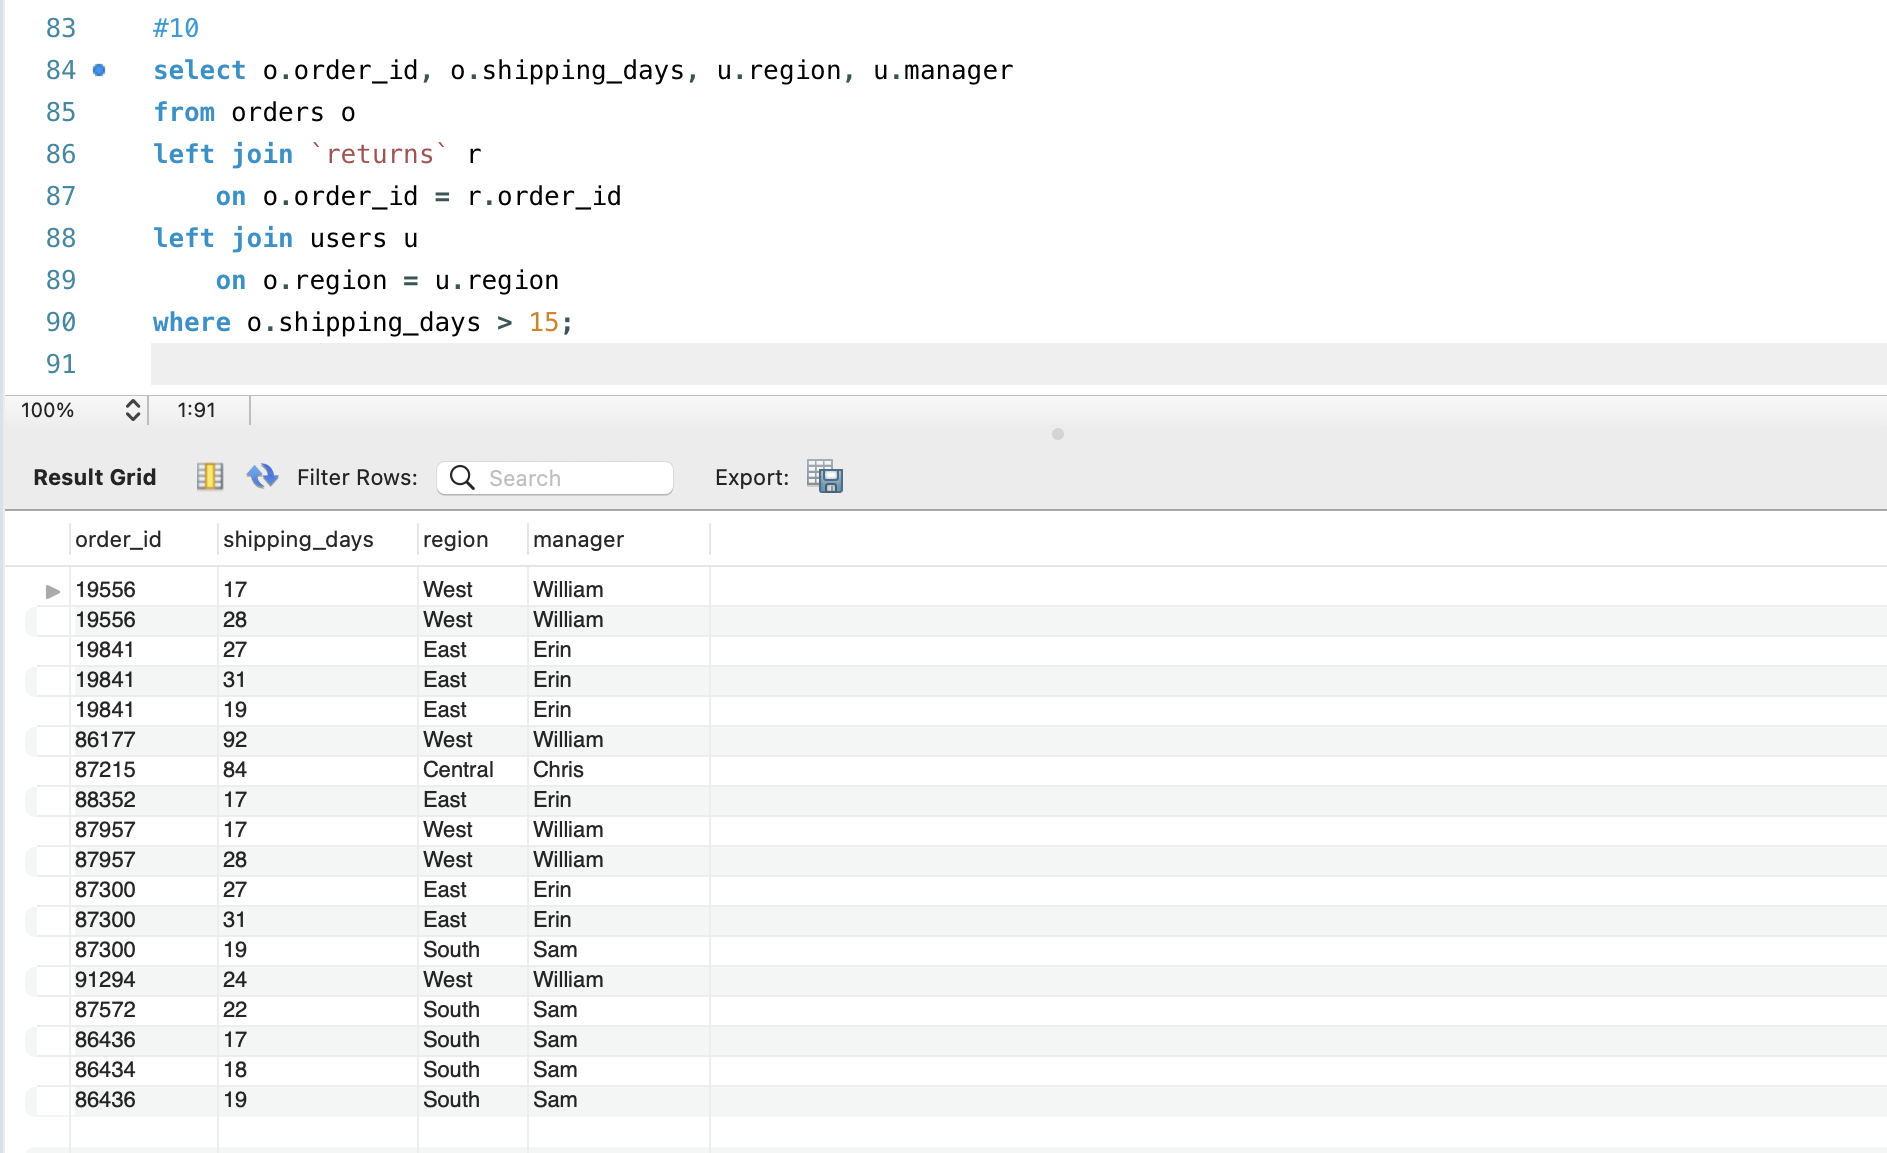

#### 11. Group by region and find out which region is more profitable 

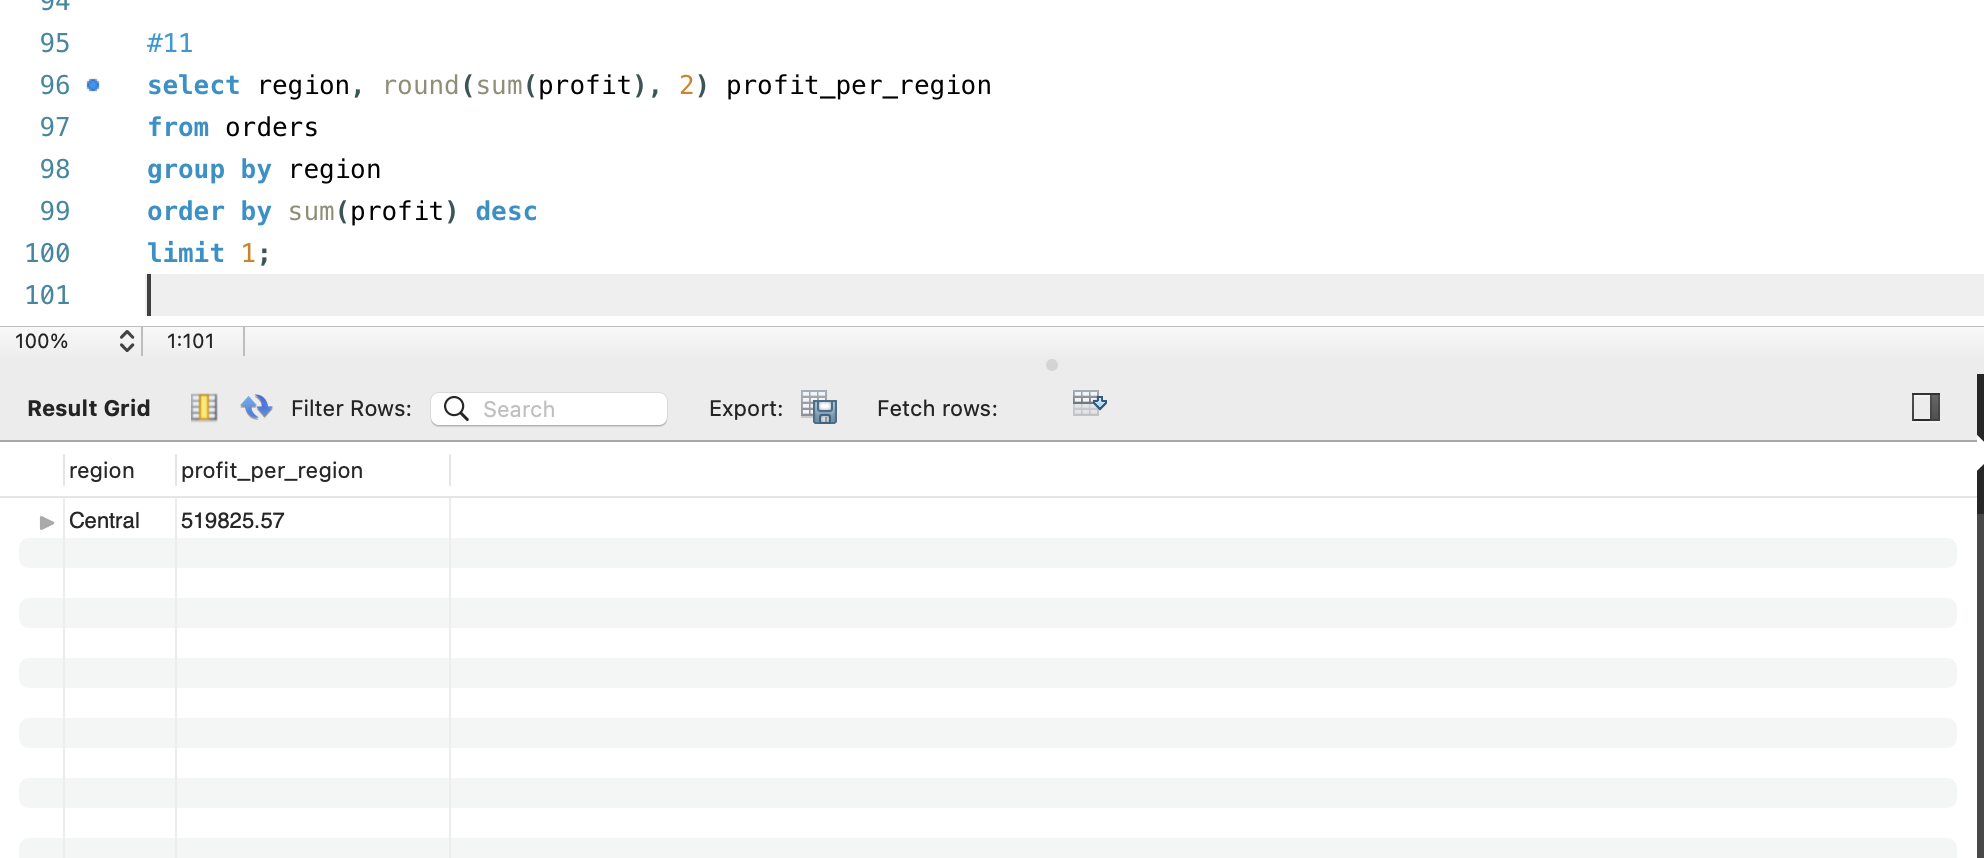

#### 12. Try to find out overall in which country we are giving more discount

Here, since country column is not present in the dataset so we can calculate the maximum discount or total discount wrt region or state or city

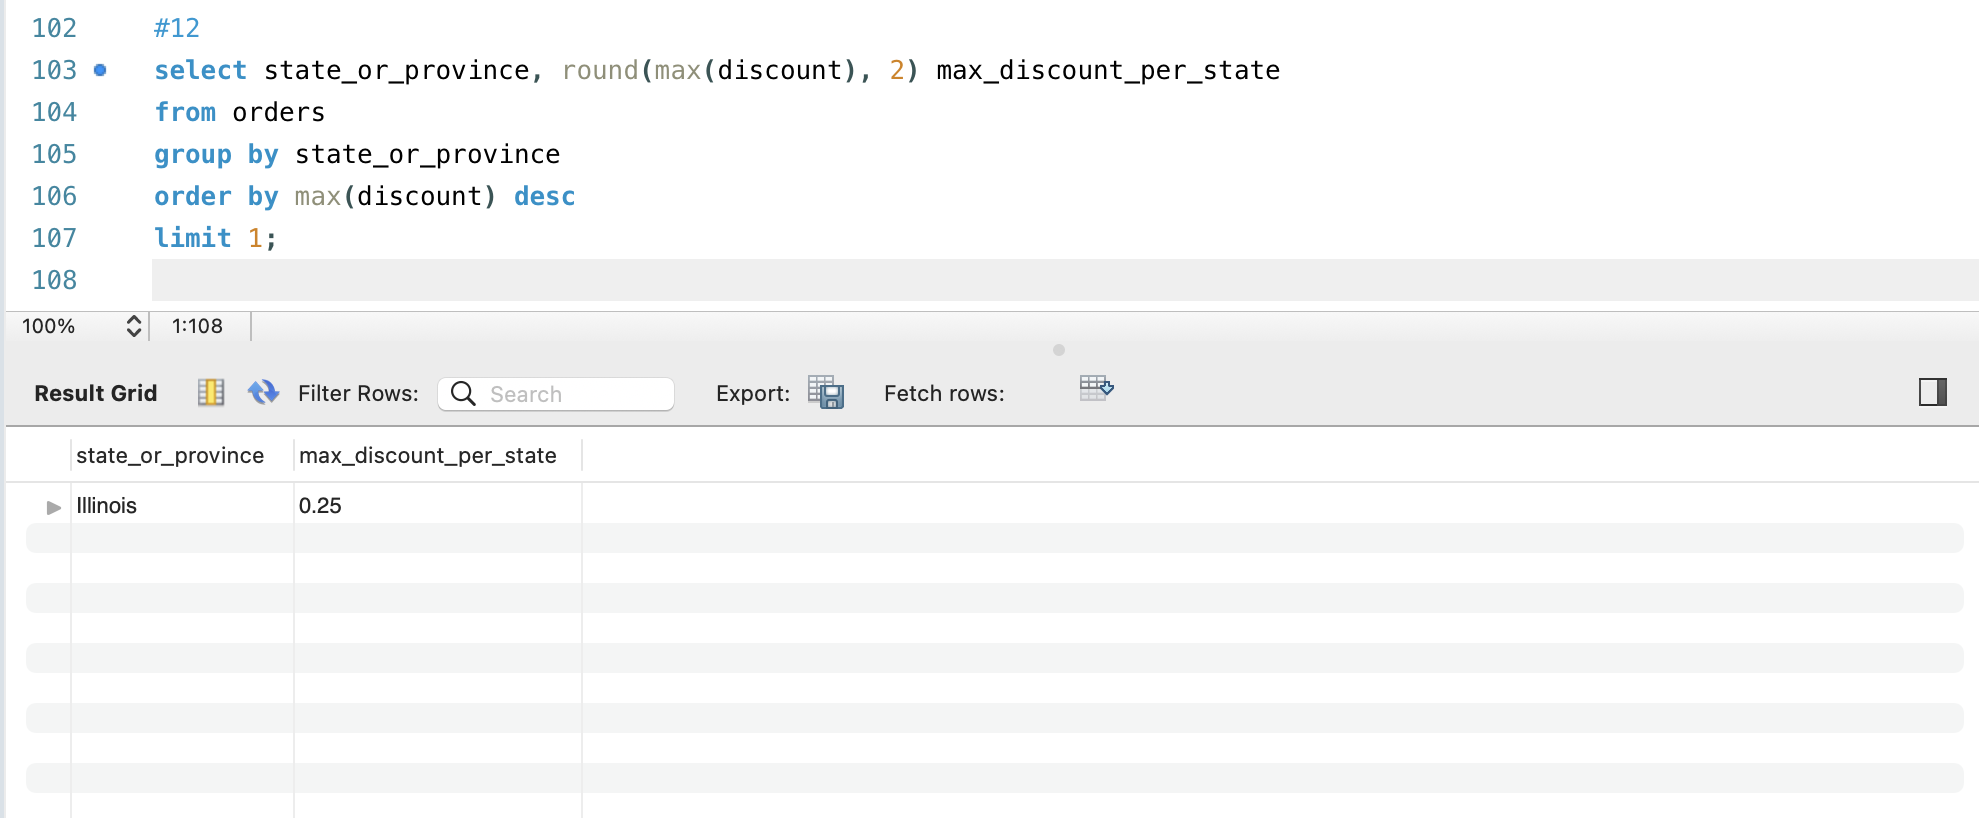

#### 13. Give me a list of unique postal code 

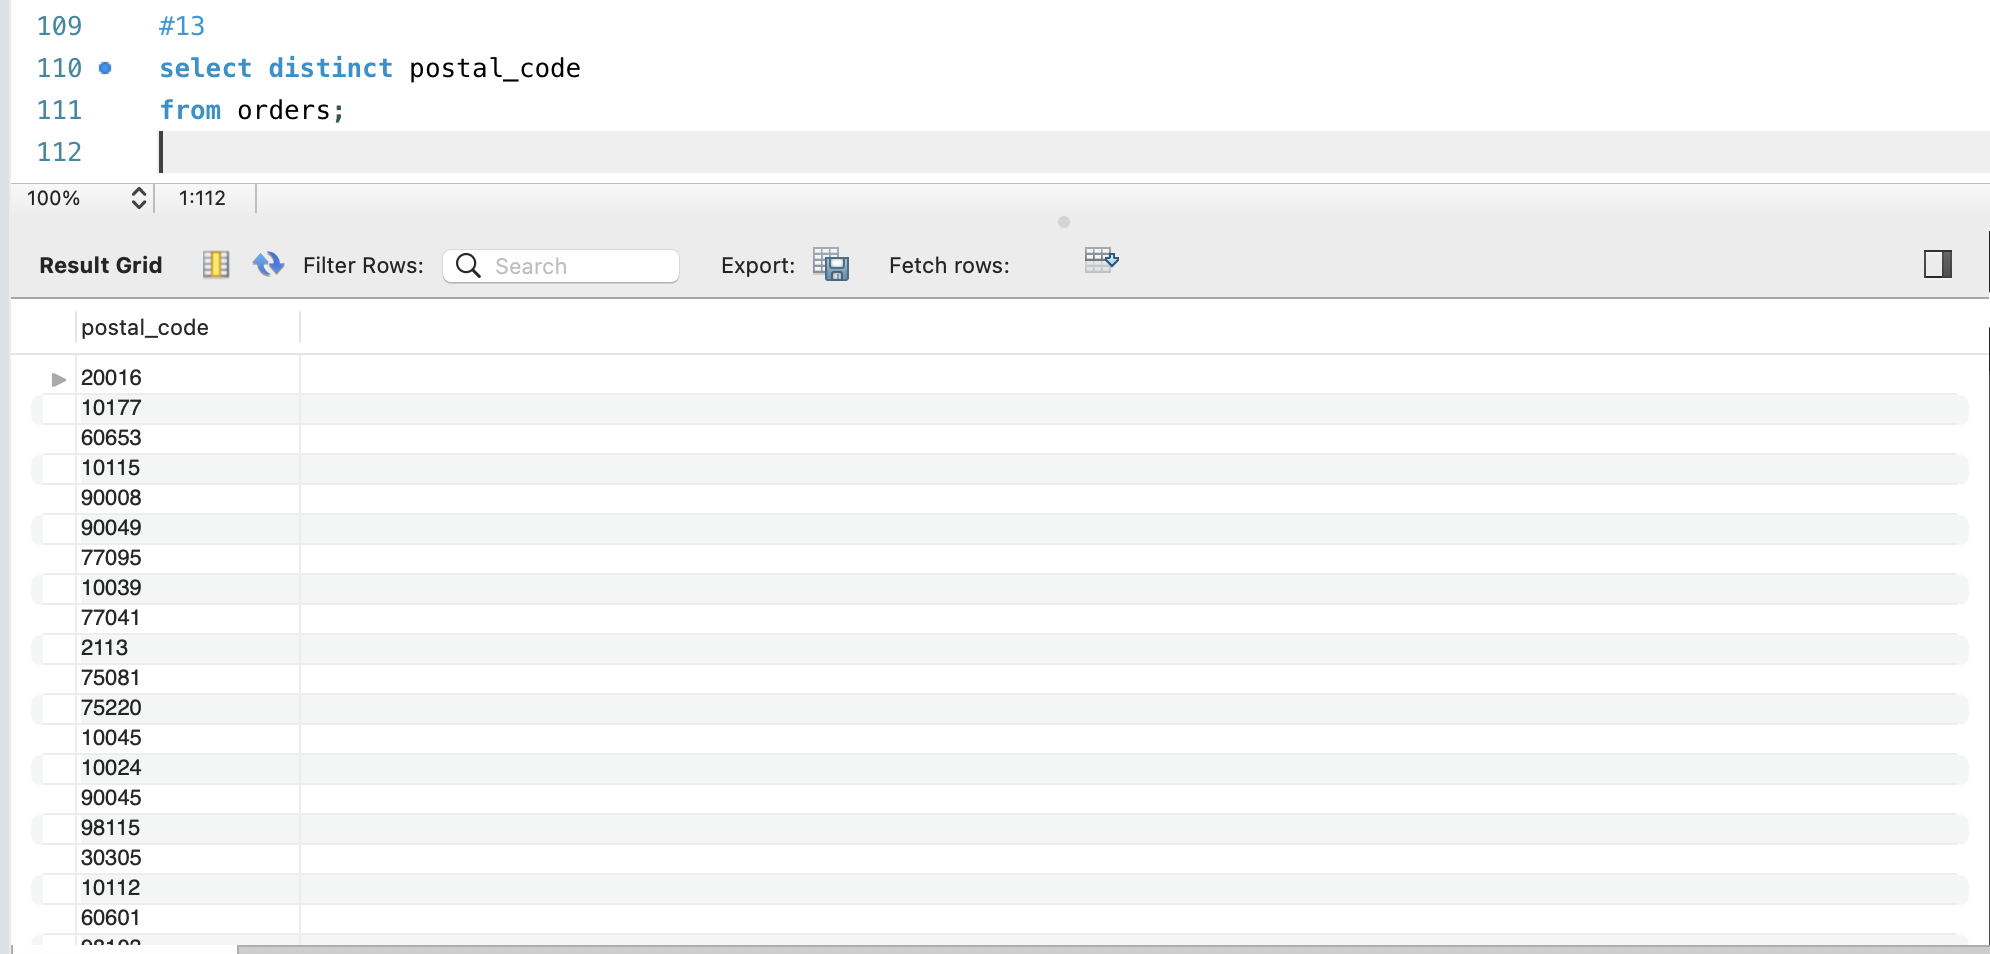

#### 14. which customer segement is more profitable find it out 

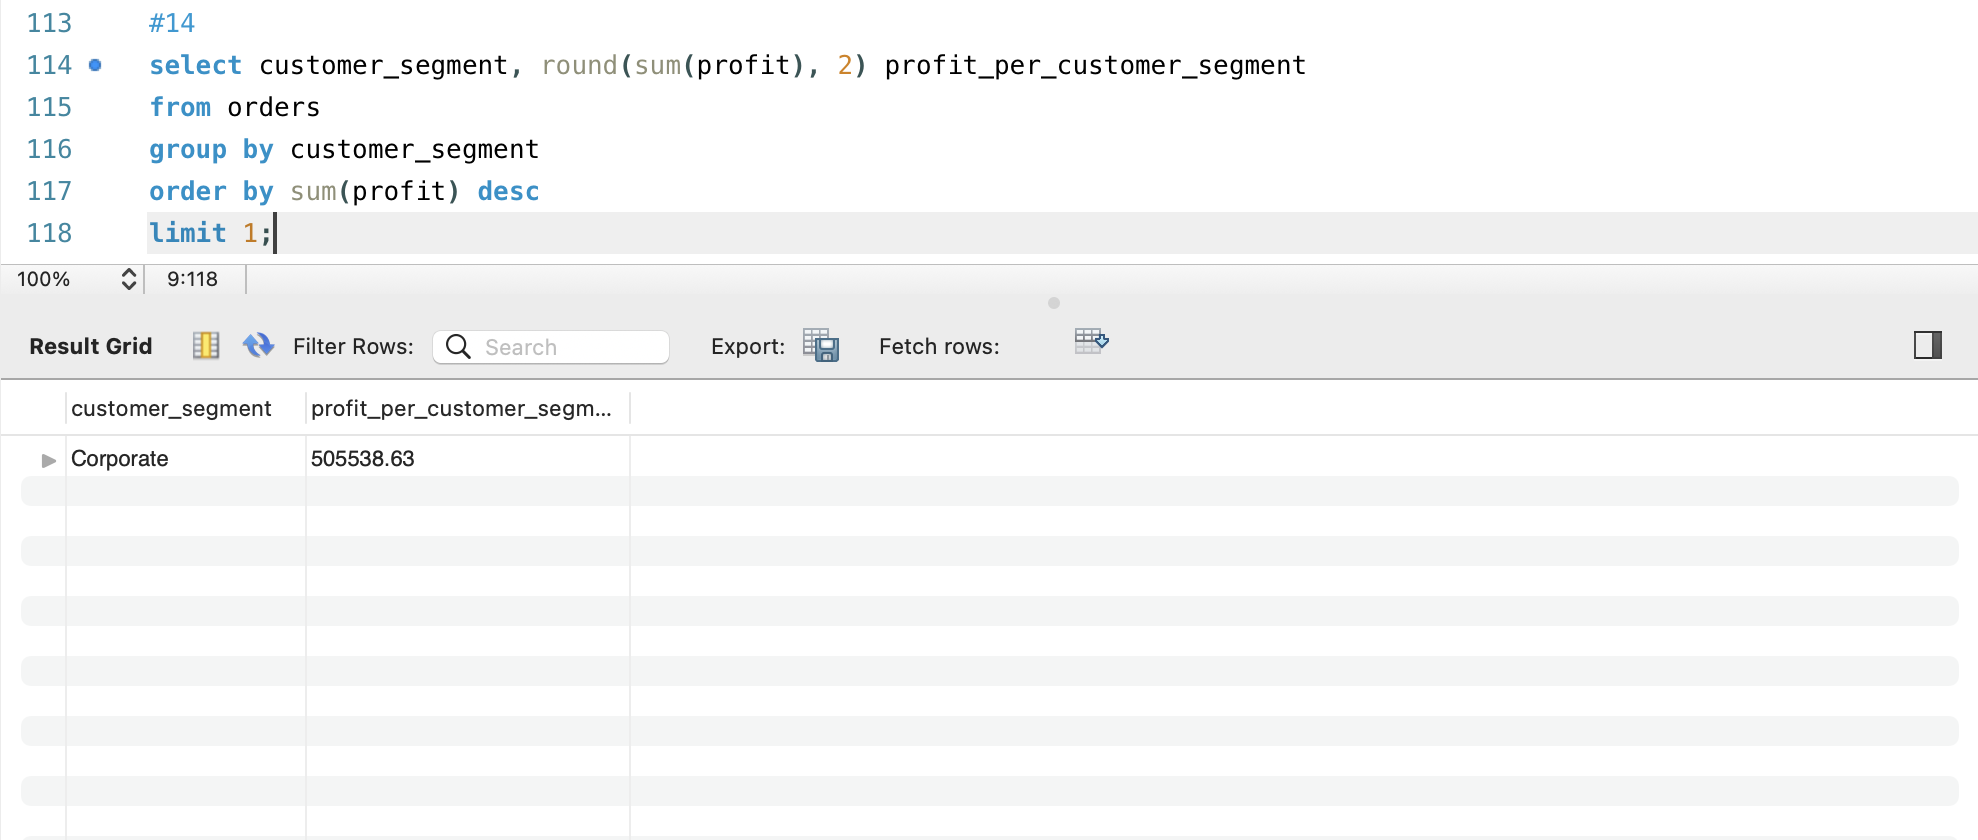

#### 15. try to find out the 10th most loss making product catagory

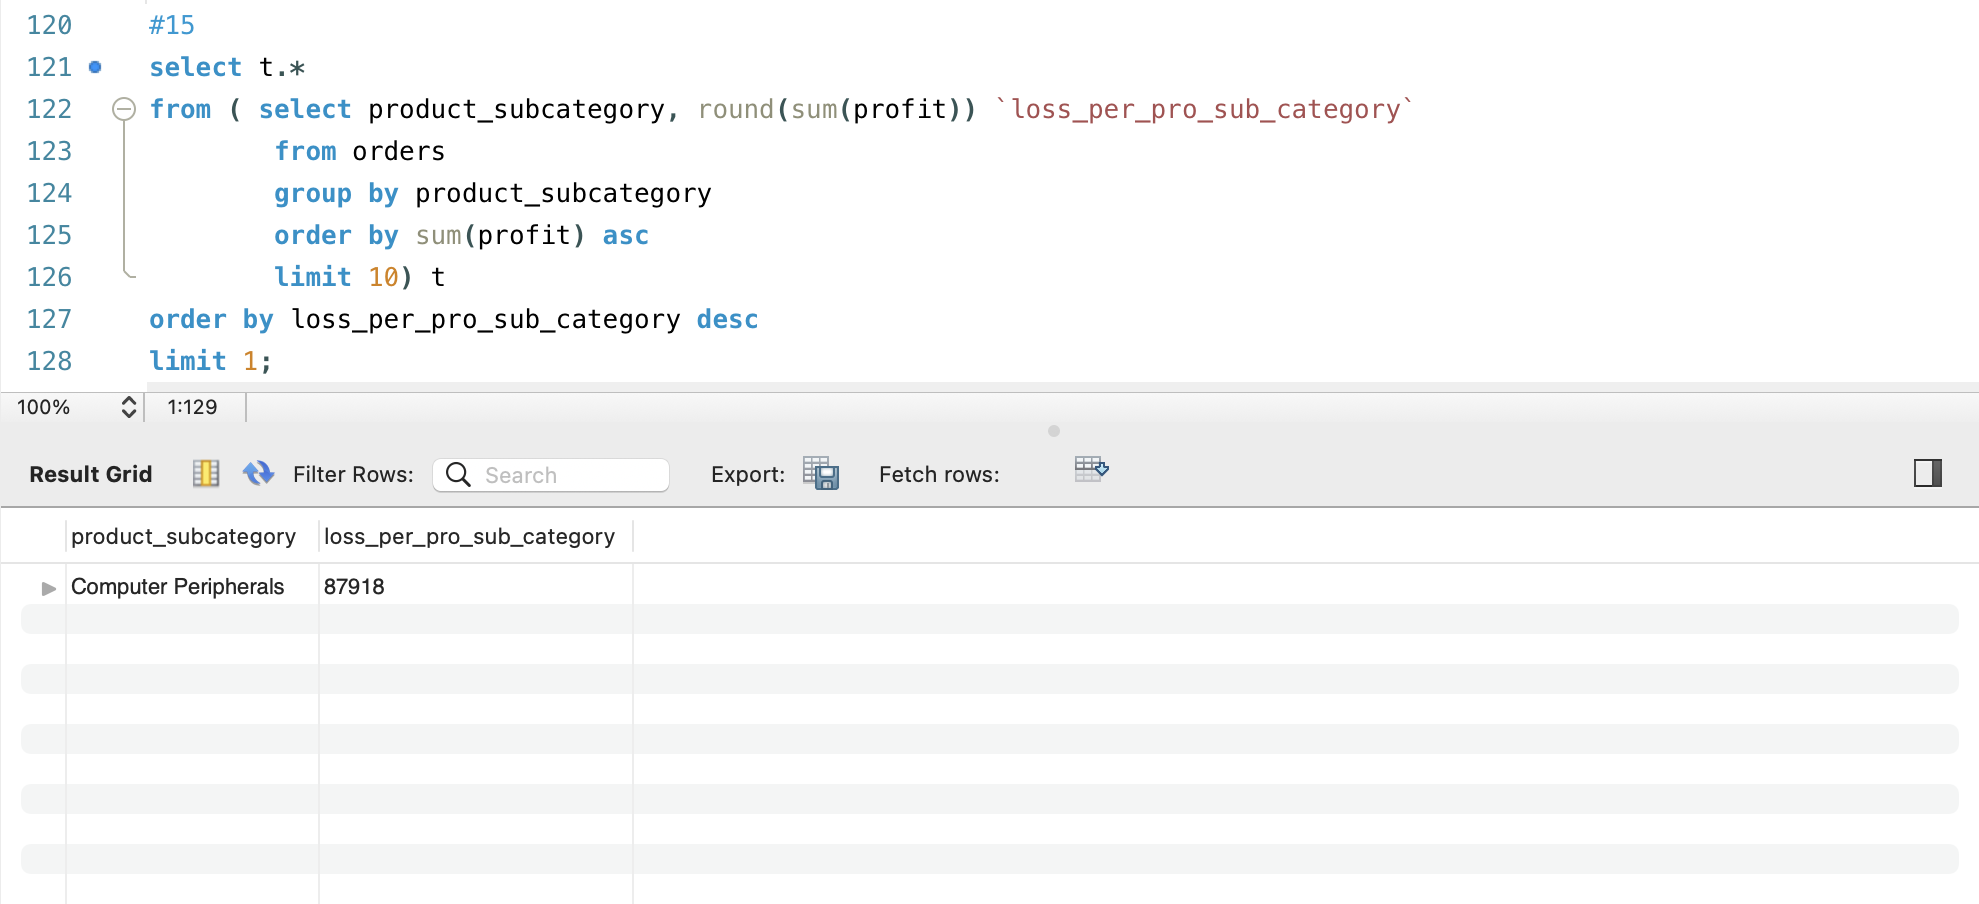

#### 16. Try to find out 10 top  product with highest margins 

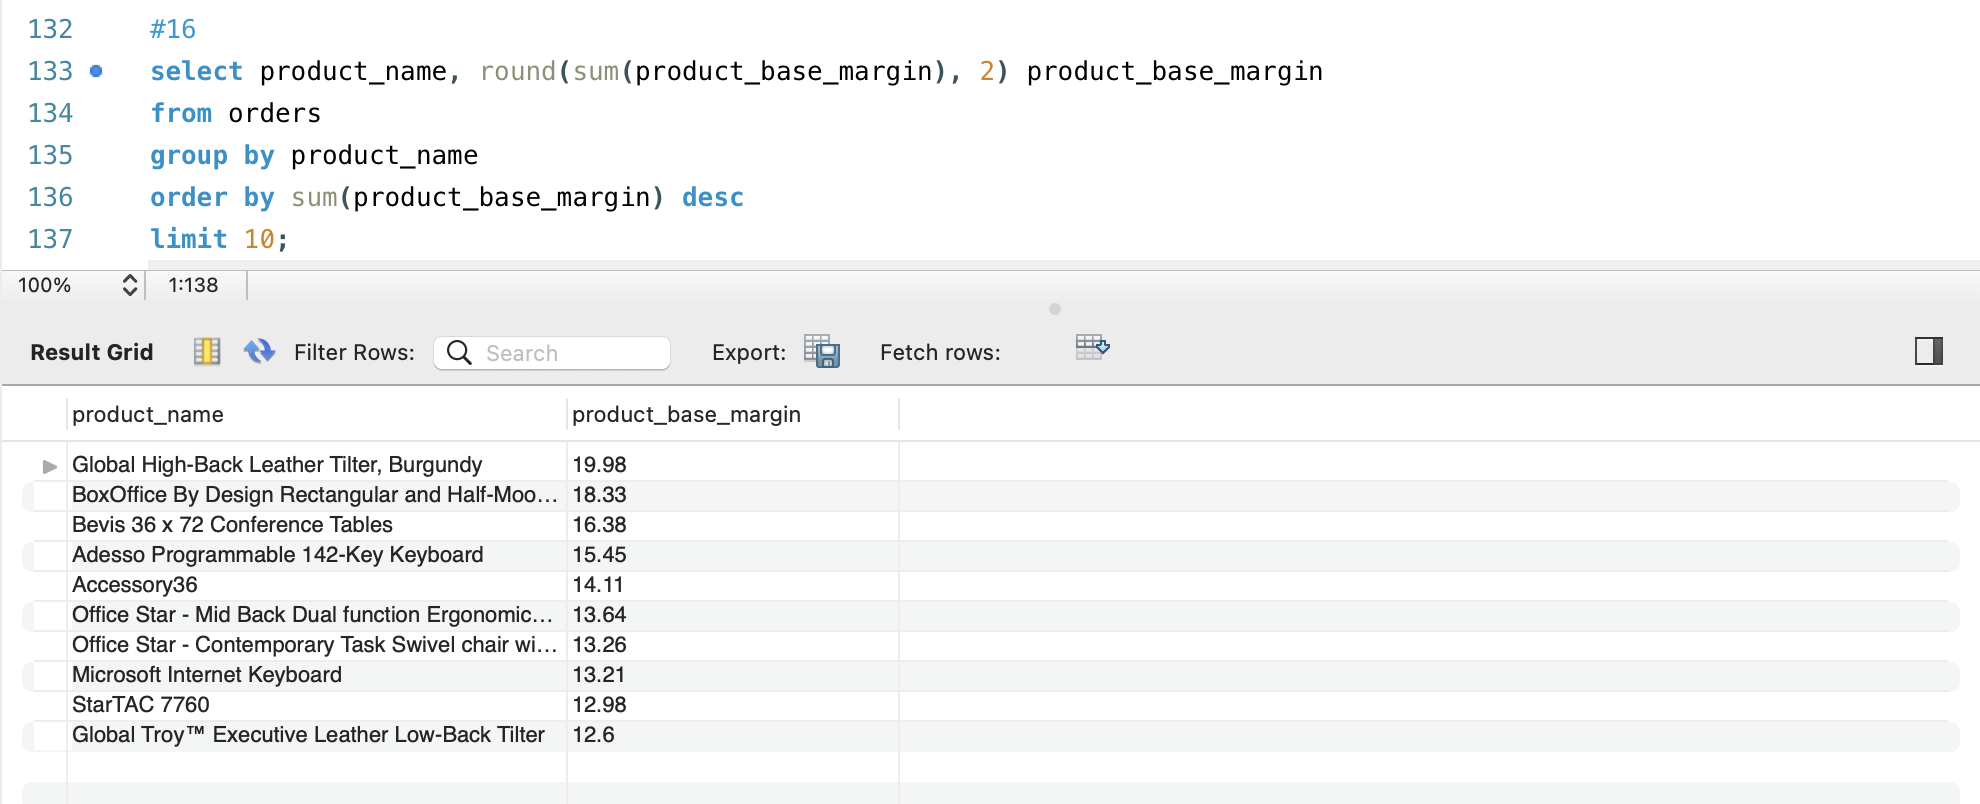